<a href="https://colab.research.google.com/github/carmeniturbe/credit_score/blob/main/2_Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task
Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Train Data

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Data/Credit Score- Train.csv')
df.head()

<ipython-input-723-dfb462eb03ed>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/Data/Credit Score- Train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


- **ID:** Represents a unique identification of an entry
- **Customer_ID:** Represents a unique identification of a person
- **Month:** Represents the month of the year
- **Name:** Represents the name of a person
- **Age:** Represents the age of the person
- **SSN:** Represents the social security number of a person
- **Occupation:** Represents the occupation of the person
- **Annual_Income:** Represents the annual income of the person
- **Monthly_Inhand_Salary:** Represents the monthly base salary of a person
- **Num_Bank_Accounts:**Represents the number of bank accounts a person holds
- **Num_Credit_Card:** Represents the number of other credit cards held by a person
- **Interest_Rate:**Represents the interest rate on credit card
- **Num_of_Loan:** Represents the number of loans taken from the bank
- **Type_of_Loan:** Represents the types of loan taken by a person
- **Delay_from_due_date:** Represents the average number of days delayed from the payment date
- **Num_of_Delayed_Payment:** Represents the average number of payments delayed by a person
- **Changed_Credit_Limit:** Represents the percentage change in credit card limit
- **Num_Credit_Inquiries:**Represents the number of credit card inquiries
- **Credit_Mix:** Represents the classification of the mix of credits
- **Outstanding_Debt**:** Represents the remaining debt to be paid
- **Credit_Utilization_Ratio:** Represents the utilization ratio of credit card
- **Credit_History_Age:** Represents the age of credit history of the person
- **Payment_of_Min_Amount:** Represents whether only the minimum amount was paid by the person
- **Total_EMI_per_month:** Represents the monthly EMI payments
- **Amount_invested_monthly:** Represents the monthly amount invested by the customer
- **Payment_Behaviour:** Represents the payment behavior of the customer
- **Monthly_Balance:**Represents the monthly balance amount of the customer
- **Credit_Score:**Represents the bracket of credit score (Poor, Standard, Good) ((Target))

In [ ]:
df.info()
# there are a couple of columns that should be numerical but were detected as object (categorical)
# A couple examples of this are the Age, Annual_Income,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.describe() # as of now the only detail that doesn't seem to make seense would be the -1.000000	in the "Num_Bank_Accounts" column

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df['Credit_Score'].value_counts() # we have 3 different categories in this classification model (Good, Standard and Poor)

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

# Preprocessing and Handle Invalid data by column

In [ ]:
df.duplicated().sum() #There aren't any duplicates in the data

0

In [ ]:
df.isna().sum() #We have a few n/a in our dataset. We'll evaluate how to handle them one by one

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
# We'll start by eliminating the columns we won't be needing
df = df.drop(columns=["ID", "Name","SSN"],axis=1)

In [ ]:
df["Customer_ID"].value_counts()
#I will keep Customer_ID (a feature that didn't suffer from missing values)
# This feature can be used as an indicator for filling missing\invalid values

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64

##Month

In [ ]:
df["Month"].value_counts().sort_index()

April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
Name: Month, dtype: int64

In [ ]:
train_month={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8}
df["Month"]=df["Month"].replace(train_month)

In [ ]:
df["Month"].dtype

dtype('int64')

## Age

In [ ]:
df["Age"].value_counts().sort_index()

-500    886
100       1
1004      1
1006      1
1010      1
       ... 
989       1
99        1
992       1
993       1
995       1
Name: Age, Length: 1788, dtype: int64

In [ ]:
# This will help us replace the values with "-" and or "_" values
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [ ]:
df["Age"] = df["Age"].apply(filter_col)
df["Age"] = df["Age"].astype(int)

We have a couple ages that don't seem to make sence like 995. We'll convert those to "nan" so we can replace them later on:

In [ ]:

for i in range(len(df["Age"])):
    if df["Age"][i] > 90 or df["Age"][i] < 10:
        df["Age"][i] = np.nan
    else:
        df["Age"][i] = df["Age"][i]

<ipython-input-738-8c2b6c21bf58>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][i] = df["Age"][i]
<ipython-input-738-8c2b6c21bf58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][i] = np.nan


In [ ]:
df["Age"].value_counts().sort_index()

14.0    1175
15.0    1574
16.0    1455
17.0    1502
18.0    2385
19.0    2793
20.0    2744
21.0    2716
22.0    2785
23.0    2654
24.0    2714
25.0    2861
26.0    2945
27.0    2859
28.0    2968
29.0    2735
30.0    2727
31.0    2955
32.0    2884
33.0    2543
34.0    2837
35.0    2866
36.0    2868
37.0    2742
38.0    2994
39.0    2846
40.0    2609
41.0    2785
42.0    2577
43.0    2734
44.0    2824
45.0    2642
46.0    1621
47.0    1227
48.0    1385
49.0    1375
50.0    1273
51.0    1291
52.0    1356
53.0    1354
54.0    1311
55.0    1366
56.0     362
Name: Age, dtype: int64

In [ ]:
df['Age'].isna().sum()

2781

In [ ]:
# We'll generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Age, customer_id_col):
    df[Age] = df.groupby(customer_id_col)[Age].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
# Replace missing values in the Age column using Customer_ID
df = replace_missing_values(df, "Age", "Customer_ID")

<ipython-input-741-ec65b02042b8>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Age] = df.groupby(customer_id_col)[Age].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Age'].isna().sum()

0

## Ocuppation

In [ ]:
df["Occupation"].value_counts() # We'll convert the "_______" to nan

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
df["Occupation"]= df["Occupation"].replace("_______",np.nan)

In [ ]:
df["Occupation"]=df["Occupation"].astype("object")

In [ ]:
# We'll replace the missing values in the "Occupation" column with random choices:

for i, value in enumerate(df["Occupation"]):
  availabe_categories = df["Occupation"].dropna().unique()
  if pd.isnull(value):  # Check if value is NaN
        random_choice = np.random.choice(availabe_categories)
        df.at[i, "Occupation"] = random_choice

In [ ]:
df["Occupation"].value_counts()

Lawyer           7065
Engineer         6842
Architect        6830
Scientist        6771
Mechanic         6741
Developer        6716
Media_Manager    6715
Accountant       6715
Teacher          6707
Entrepreneur     6612
Doctor           6580
Journalist       6562
Manager          6433
Musician         6389
Writer           6322
Name: Occupation, dtype: int64

In [ ]:
df['Occupation'].isna().sum()

0

In [ ]:
df["Occupation"].value_counts()

Lawyer           7065
Engineer         6842
Architect        6830
Scientist        6771
Mechanic         6741
Developer        6716
Media_Manager    6715
Accountant       6715
Teacher          6707
Entrepreneur     6612
Doctor           6580
Journalist       6562
Manager          6433
Musician         6389
Writer           6322
Name: Occupation, dtype: int64

##Annual_Inconme:

In [ ]:
df["Annual_Income"].value_counts().sort_index()

10001727.0    1
10003.495     7
10003.495_    1
10004.805     8
100058.19     7
             ..
99984.48      8
9999.42       7
9999.42_      1
99990.78      8
99995.22      8
Name: Annual_Income, Length: 18940, dtype: int64

In [ ]:
df["Annual_Income"] = df["Annual_Income"].apply(filter_col) #To remove the "_" and "-" on the values
df["Annual_Income"] = df["Annual_Income"].astype(float)

In [ ]:
df["Annual_Income"].dtype

dtype('float64')

In [ ]:
df['Annual_Income'].isna().sum()

0

In [ ]:
df["Annual_Income"].value_counts().sort_index()

7.005930e+03    8
7.006035e+03    8
7.006520e+03    8
7.011685e+03    8
7.012310e+03    8
               ..
2.410537e+07    1
2.416001e+07    1
2.417715e+07    1
2.418881e+07    1
2.419806e+07    1
Name: Annual_Income, Length: 13487, dtype: int64

In [ ]:
df["Annual_Income"].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

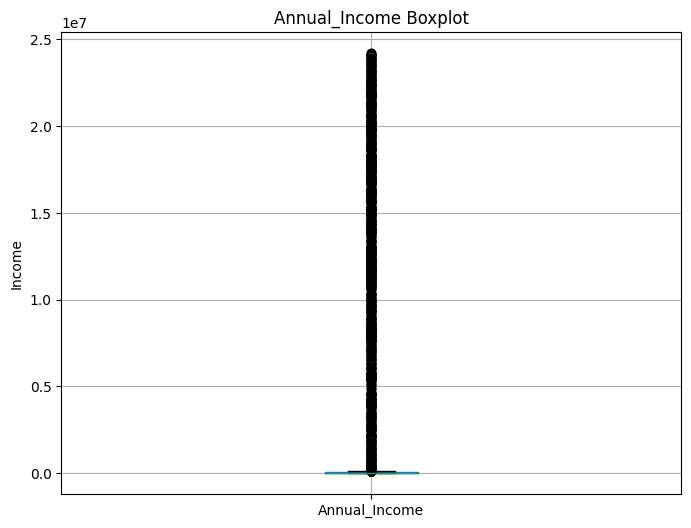

In [ ]:
variables = ["Annual_Income"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Annual_Income Boxplot")

plt.ylabel("Income")
plt.show()
# We have a significan number of outliers in this column
# However, this is a global company and the income of their clients could vary depending on their location

##Monthly_Inhand_Salary

In [ ]:
df["Monthly_Inhand_Salary"].value_counts().sort_index()

303.645417      8
319.556250      7
332.128333      7
332.431250      6
333.596667      6
               ..
15101.940000    8
15115.190000    7
15136.696667    7
15167.180000    8
15204.633333    7
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

In [ ]:
# We'll generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Monthly_Inhand_Salary, customer_id_col):
    df[Monthly_Inhand_Salary] = df.groupby(customer_id_col)[Monthly_Inhand_Salary].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
# Replace missing values in the Monthly_Inhand_Salary column using Customer_ID
df = replace_missing_values(df, "Monthly_Inhand_Salary", "Customer_ID")

<ipython-input-759-740946ffae58>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Monthly_Inhand_Salary] = df.groupby(customer_id_col)[Monthly_Inhand_Salary].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Monthly_Inhand_Salary'].isna().sum()

0

In [ ]:
df["Monthly_Inhand_Salary"].describe()

count    100000.000000
mean       4198.080838
std        3186.999014
min         303.645417
25%        1626.594167
50%        3096.378333
75%        5961.637500
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

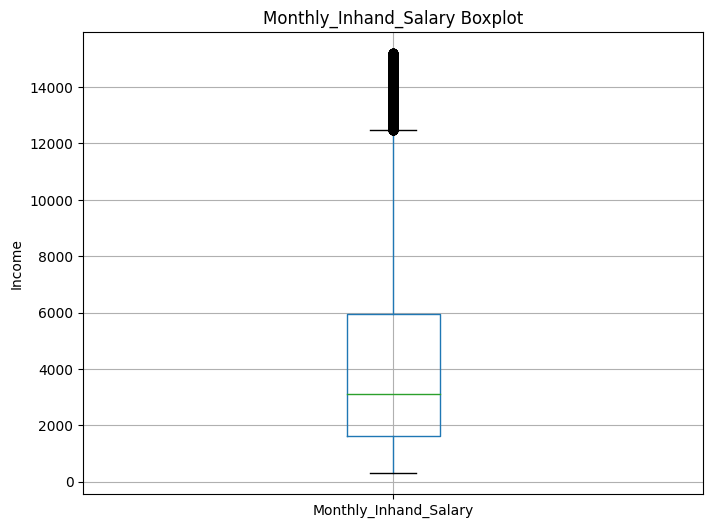

In [ ]:
variables = ["Monthly_Inhand_Salary"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Monthly_Inhand_Salary Boxplot")

plt.ylabel("Income")
plt.show()
# We also seem to have a couple outliers in this column but we'll keep them
# This is a global company and the income of their clients could vary depending on their location

##Num_Bank_Accounts

In [ ]:
df["Num_Bank_Accounts"].value_counts().sort_index()

-1          21
 0        4328
 1        4490
 2        4304
 3       11950
         ...  
 1786        1
 1789        2
 1793        1
 1794        2
 1798        2
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [ ]:
df[df["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].value_counts()

-1    21
Name: Num_Bank_Accounts, dtype: int64

In [ ]:
# We'll assume the "-1" bank accounts means the client doesn't have a bank account so we'll replace it with 0
df["Num_Bank_Accounts"]=df["Num_Bank_Accounts"].replace(-1,0)

In [ ]:
#It doesn't make sense that someone could have over 10 bank accounts
#According to the report '12 Banking Statistics Everyone Should Know' (GetEvolved, 2023), The average person in the US has approximately 5.3 bank accounts
df[df["Num_Bank_Accounts"]> 10]["Num_Bank_Accounts"].value_counts()

11      9
803     7
105     5
791     5
1668    5
       ..
1626    1
1470    1
887     1
211     1
697     1
Name: Num_Bank_Accounts, Length: 931, dtype: int64

In [ ]:
# We'll replace the numbers of bank accounts over 10 with nan
for i in range(len(df["Num_Bank_Accounts"])) :
    if df["Num_Bank_Accounts"][i] > 10 :
        df["Num_Bank_Accounts"][i]= np.nan
    else:
        df["Num_Bank_Accounts"][i]= df["Num_Bank_Accounts"][i]

<ipython-input-768-7b9f1d132603>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Bank_Accounts"][i]= df["Num_Bank_Accounts"][i]
<ipython-input-768-7b9f1d132603>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Bank_Accounts"][i]= np.nan


In [ ]:
df[df["Num_Bank_Accounts"]> 10]["Num_Bank_Accounts"].value_counts()

Series([], Name: Num_Bank_Accounts, dtype: int64)

In [ ]:
df['Num_Bank_Accounts'].isna().sum()

1324

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Num_Bank_Accounts, customer_id_col):
    df[Num_Bank_Accounts] = df.groupby(customer_id_col)[Num_Bank_Accounts].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
# Replace missing values in the Num_of_Loan column using Customer_ID
df = replace_missing_values(df, "Num_Bank_Accounts", "Customer_ID")

<ipython-input-771-68783de2c1e4>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Num_Bank_Accounts] = df.groupby(customer_id_col)[Num_Bank_Accounts].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Num_Bank_Accounts'].isna().sum()

0

In [ ]:
df["Num_Bank_Accounts"].describe()

count    100000.000000
mean          5.368690
std           2.593103
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Num_Bank_Accounts, dtype: float64

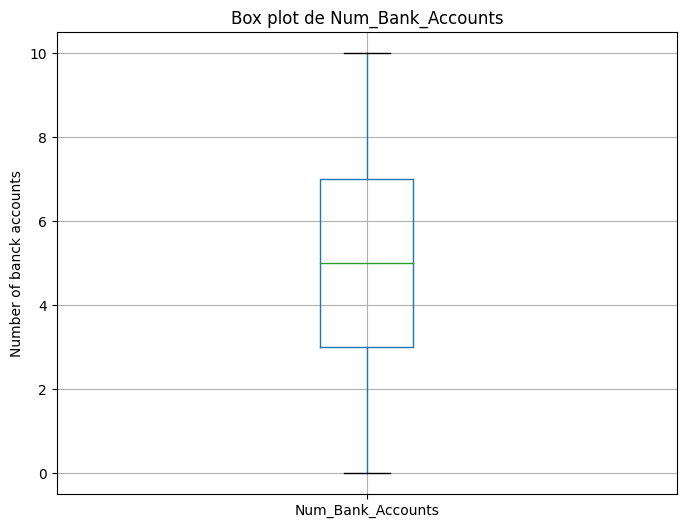

In [ ]:
variables = ["Num_Bank_Accounts"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Box plot de Num_Bank_Accounts")
plt.ylabel("Number of banck accounts")
plt.show()
#Now the column is balanced

##Num_Credit_Card



In [ ]:
df["Num_Credit_Card"].value_counts().sort_index()

0          13
1        2132
2        2149
3       13277
4       14030
        ...  
1495        1
1496        2
1497        3
1498        3
1499        2
Name: Num_Credit_Card, Length: 1179, dtype: int64

In [ ]:
df["Num_Credit_Card"].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [ ]:
df['Num_Credit_Card'].isna().sum()

0

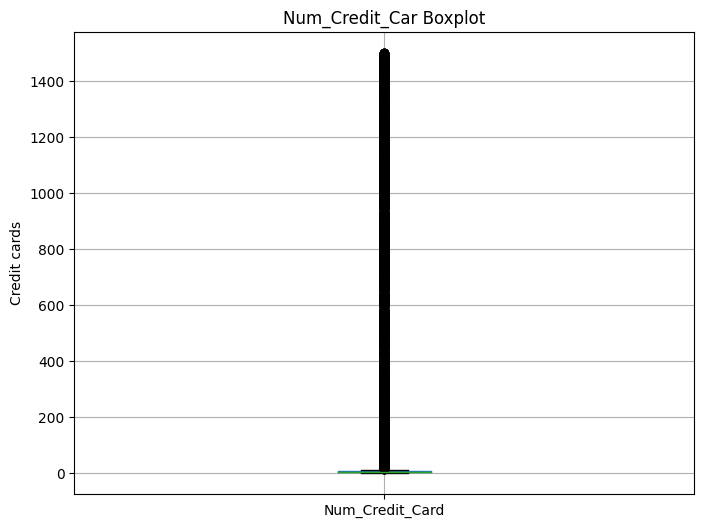

In [ ]:
variables = ["Num_Credit_Card"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Num_Credit_Car Boxplot")

plt.ylabel("Credit cards")
plt.show()
#Some numbers don't make sense here. Having over 1400 credit cards doesn't seem to be accurate.
#The average American have 4 credit cards, according to the 2019 Experian Consumer Credit Review.

In [ ]:
# We'll replace the numbers of credit cards over 10 with nan
for i in range(len(df["Num_Credit_Card"])) :
    if df["Num_Credit_Card"][i] > 10 :
        df["Num_Credit_Card"][i]= np.nan
    else:
        df["Num_Credit_Card"][i]= df["Num_Credit_Card"][i]

<ipython-input-780-046c5ea1f41e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Credit_Card"][i]= df["Num_Credit_Card"][i]
<ipython-input-780-046c5ea1f41e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Credit_Card"][i]= np.nan


In [ ]:
df[df["Num_Credit_Card"]> 10]["Num_Credit_Card"].value_counts()

Series([], Name: Num_Credit_Card, dtype: int64)

In [ ]:
df['Num_Credit_Card'].isna().sum()

2307

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Num_Credit_Card, customer_id_col):
    df[Num_Credit_Card] = df.groupby(customer_id_col)[Num_Credit_Card].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
# Replace missing values in the Num_of_Loan column using Customer_ID
df = replace_missing_values(df, "Num_Credit_Card", "Customer_ID")

<ipython-input-783-daf23ecc7859>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Num_Credit_Card] = df.groupby(customer_id_col)[Num_Credit_Card].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Num_Credit_Card'].isna().sum()

0

In [ ]:
df["Num_Credit_Card"].describe()

count    100000.000000
mean          5.533270
std           2.066194
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Num_Credit_Card, dtype: float64

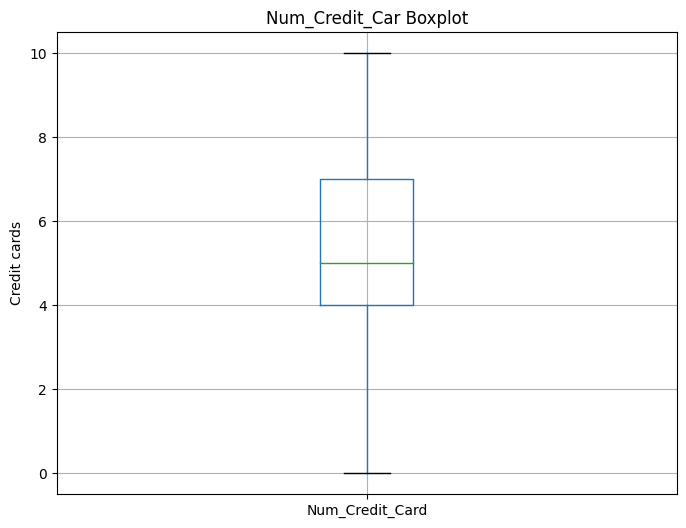

In [ ]:
variables = ["Num_Credit_Card"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Num_Credit_Car Boxplot")

plt.ylabel("Credit cards")
plt.show()
#Now the column is balanced

##Interest_Rate

In [ ]:
df["Interest_Rate"].value_counts().sort_index()

1       2683
2       2465
3       2765
4       2589
5       4979
        ... 
5775       1
5776       1
5788       1
5789       1
5797       1
Name: Interest_Rate, Length: 1750, dtype: int64

In [ ]:
df["Interest_Rate"].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [ ]:
df['Interest_Rate'].isna().sum()

0

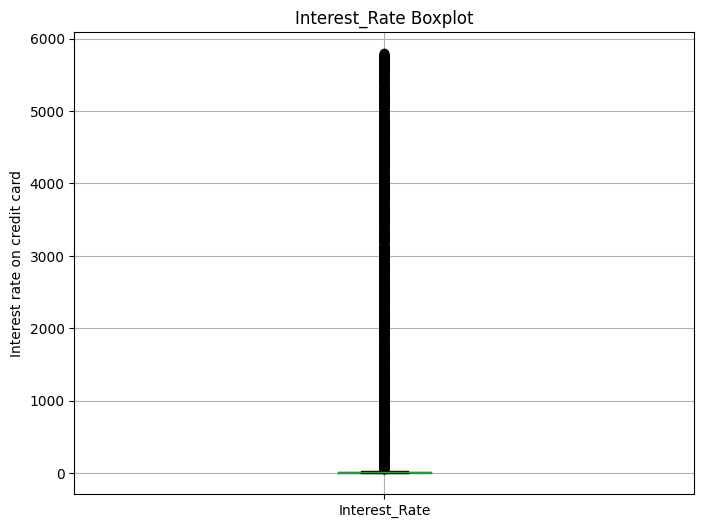

In [ ]:
# Outliers visualization
variables = ["Interest_Rate"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Interest_Rate Boxplot")

plt.ylabel("Interest rate on credit card")
plt.show()

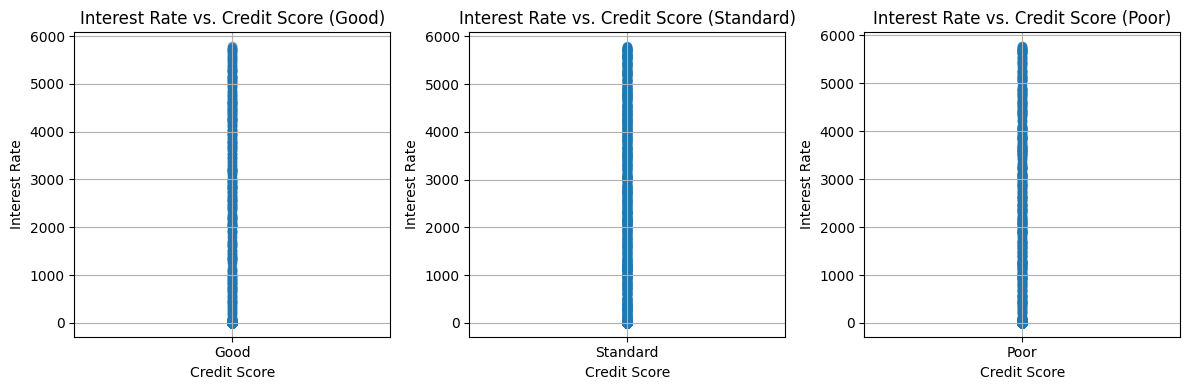

In [ ]:
# Filter the dataset for each credit score category
good_credit_df = df[df['Credit_Score'] == 'Good']
standard_credit_df = df[df['Credit_Score'] == 'Standard']
poor_credit_df = df[df['Credit_Score'] == 'Poor']

# Create a scatter plot for "Good" credit score
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(good_credit_df['Credit_Score'], good_credit_df['Interest_Rate'], alpha=0.5)
plt.title('Interest Rate vs. Credit Score (Good)')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.grid(True)

# Create a scatter plot for "Standard" credit score
plt.subplot(1, 3, 2)
plt.scatter(standard_credit_df['Credit_Score'], standard_credit_df['Interest_Rate'], alpha=0.5)
plt.title('Interest Rate vs. Credit Score (Standard)')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.grid(True)

# Create a scatter plot for "Poor" credit score
plt.subplot(1, 3, 3)
plt.scatter(poor_credit_df['Credit_Score'], poor_credit_df['Interest_Rate'], alpha=0.5)
plt.title('Interest Rate vs. Credit Score (Poor)')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.grid(True)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

The Credit score column also seems to have a lot of mistaken data. It's illogical that a Customer with a good credit score will get high interest rate.

The average credit rate in america is 24% . I'll double that to be conservative and I'll assume all values avobe 48% are invalid and will replace them with back-forward values.

In [ ]:
df[df["Interest_Rate"]> 48]["Interest_Rate"].value_counts()

4676    4
1944    4
498     4
3089    4
2158    3
       ..
2147    1
4995    1
1899    1
2120    1
5729    1
Name: Interest_Rate, Length: 1716, dtype: int64

In [ ]:
# We'll replace the interest rate over 48 with nan
for i in range(len(df["Interest_Rate"])) :
    if df["Interest_Rate"][i] > 48 :
        df["Interest_Rate"][i]= np.nan
    else:
        df["Interest_Rate"][i]= df["Interest_Rate"][i]

<ipython-input-794-0fd3f3b7771f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Interest_Rate"][i]= df["Interest_Rate"][i]
<ipython-input-794-0fd3f3b7771f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Interest_Rate"][i]= np.nan


In [ ]:
df[df["Interest_Rate"]> 48]["Interest_Rate"].value_counts()

Series([], Name: Interest_Rate, dtype: int64)

In [ ]:
df['Interest_Rate'].isna().sum()

2034

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Interest_Rate, customer_id_col):
    df[Interest_Rate] = df.groupby(customer_id_col)[Interest_Rate].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
# Replace missing values in the Num_of_Loan column using Customer_ID
df = replace_missing_values(df, "Interest_Rate", "Customer_ID")

<ipython-input-797-5c9a08d4d570>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Interest_Rate] = df.groupby(customer_id_col)[Interest_Rate].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Interest_Rate'].isna().sum()

0

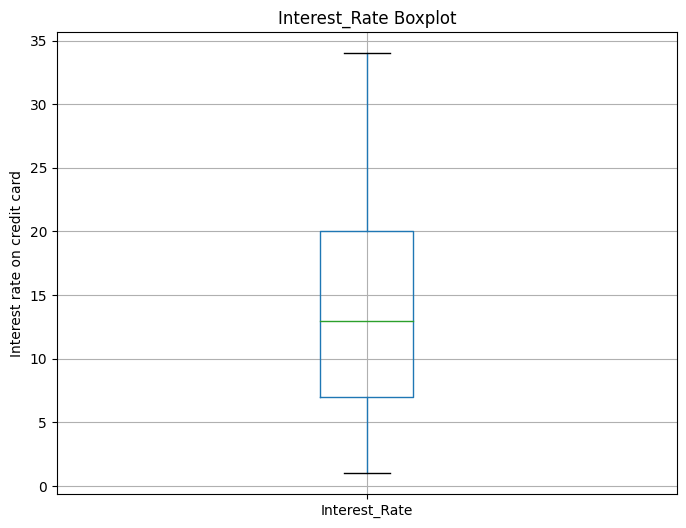

In [ ]:
# Outliers visualization
variables = ["Interest_Rate"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Interest_Rate Boxplot")

plt.ylabel("Interest rate on credit card")
plt.show()

## Num_of_Loan:

In [ ]:
df["Num_of_Loan"].value_counts().sort_index() # There seem to be a couple outliers in this column

-100     3876
0       10380
0_        550
1       10083
100         1
        ...  
991         1
995         1
996         1
999         1
9_        160
Name: Num_of_Loan, Length: 434, dtype: int64

In [ ]:
df["Num_of_Loan"] = df["Num_of_Loan"].apply(filter_col)
df["Num_of_Loan"] = df["Num_of_Loan"].astype(float)

In [ ]:
df[df["Num_of_Loan"]>100]



,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
21,CUS_0x2dbc,6,34.0,Engineer,143162.640,12187.220000,1.0,5.0,8.0,967.0,...,Good,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good
810,CUS_0x6435,3,26.0,Writer,134321.440,11064.453333,3.0,5.0,12.0,1464.0,...,Standard,1428.68,34.223492,32 Years and 10 Months,Yes,253.688244,NaN,High_spent_Large_value_payments,949.50237002121,Standard
1390,CUS_0x64ce,7,21.0,Lawyer,124419.660,10221.305000,3.0,4.0,11.0,622.0,...,Good,923.85,27.446584,32 Years and 5 Months,No,344.181536,288.5644231990985,!@9#%8,659.3845412285783,Standard
2008,CUS_0x4256,1,21.0,Accountant,31069.320,2361.110000,2.0,3.0,12.0,352.0,...,Good,343.6,36.403191,18 Years and 11 Months,No,34.168604,139.0871475028147,Low_spent_Medium_value_payments,342.85524804686975,Good
2273,CUS_0xf59,2,21.0,Media_Manager,38539.570,3438.630833,4.0,2.0,3.0,472.0,...,Good,526.62,30.039998,29 Years and 8 Months,No,22.683279,285.2820709121632,Low_spent_Small_value_payments,325.89773325381765,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99760,CUS_0x1b07,1,35.0,Manager,17818.600,1659.883333,4.0,6.0,14.0,661.0,...,Standard,301.52,26.264920,18 Years and 3 Months,No,11.581102,203.73326800679658,Low_spent_Small_value_payments,240.673964,Standard
99769,CUS_0xc345,2,23.0,Architect,60015.320,5121.276667,7.0,4.0,14.0,978.0,...,_,1095.15,35.864367,15 Years and 3 Months,Yes,187.008683,241.3136321224612,Low_spent_Large_value_payments,353.805352,Standard
99845,CUS_0x944e,6,23.0,Architect,11834.645,688.220417,5.0,7.0,10.0,216.0,...,Standard,1095.9,33.072088,NaN,Yes,11.089575,45.45549889013685,Low_spent_Small_value_payments,302.276968,Standard
99853,CUS_0x3048,6,40.0,Scientist,81093.160,7017.763333,10.0,7.0,17.0,349.0,...,Bad,4523.3,35.925627,9 Years and 10 Months,NM,409.039442,314.5804094778409,Low_spent_Medium_value_payments,258.156482,Standard


Acquiring 1464 loans would be an extremely unusual and challenging situation for most individuals, regardless of age.

In [ ]:
df["Num_of_Loan"].nunique()

413

In [ ]:
#replace all the values higher than 100 for NAN
for i in range(len(df["Num_of_Loan"])):
    if df["Num_of_Loan"][i] > 100:
        df["Num_of_Loan"][i] = np.nan
    else:
        df["Num_of_Loan"][i] = df["Num_of_Loan"][i]

<ipython-input-805-8979a82fdad8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_of_Loan"][i] = df["Num_of_Loan"][i]
<ipython-input-805-8979a82fdad8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_of_Loan"][i] = np.nan


In [ ]:
df.Num_of_Loan.describe()

count    99563.000000
mean         7.306690
std         18.838452
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        100.000000
Name: Num_of_Loan, dtype: float64

In [ ]:
df['Num_of_Loan'].isna().sum()

437

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, num_of_loan_col, customer_id_col):
    df[num_of_loan_col] = df.groupby(customer_id_col)[num_of_loan_col].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
# Replace missing values in the Num_of_Loan column using Customer_ID
df = replace_missing_values(df, "Num_of_Loan", "Customer_ID")

<ipython-input-808-973fec3944b4>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[num_of_loan_col] = df.groupby(customer_id_col)[num_of_loan_col].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Num_of_Loan'].isna().sum()

0

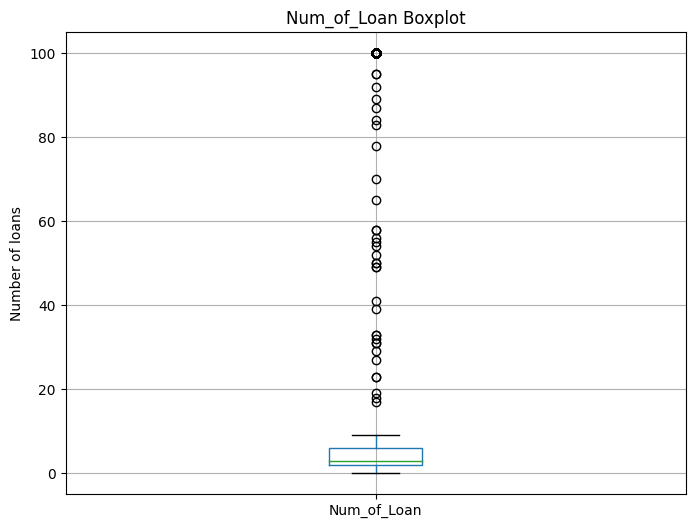

In [ ]:
variables = ["Num_of_Loan"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Num_of_Loan Boxplot")
plt.ylabel("Number of loans")
plt.show()
# Even after reducing the number of loans to 100, we still have a significant number of outliers

In [ ]:
# We'll convert this column to categorical by using percentiles to reduce the noise caused by the outliers
# We'll Define percentiles for categorization
Q1 = df["Num_of_Loan"].quantile(0.25)
Q3 = df["Num_of_Loan"].quantile(0.75)

# We'll create a function to categorize the data
def categorize_loans(num_loans):
    if num_loans <= Q1:
        return "Low"
    elif Q1 < num_loans <= Q3:
        return "Medium"
    else:
        return "High"

# We'll apply the categorization function to create a new column
df["Loan_Category"] = df["Num_of_Loan"].apply(categorize_loans)

In [ ]:
df["Loan_Category"].value_counts()

Medium    45040
Low       36734
High      18226
Name: Loan_Category, dtype: int64

##Loan_Category

(Categorial column created from Num_of_Loan)

In [ ]:
df["Loan_Category"].value_counts()

Medium    45040
Low       36734
High      18226
Name: Loan_Category, dtype: int64

In [ ]:
# We'll replace the values to convert this column to numerical
df['Loan_Category'] = df['Loan_Category'].replace({'Low': 1, 'Medium': 2,'High': 3})
df['Loan_Category'].value_counts()

2    45040
1    36734
3    18226
Name: Loan_Category, dtype: int64

In [ ]:
df['Loan_Category'].isna().sum()

0

##Type_of_Loan

In [ ]:
df["Type_of_Loan"].value_counts().sort_index()

Auto Loan                                                                                                                                   1152
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Credit-Builder Loan, Mortgage Loan, and Personal Loan                         8
Auto Loan, Auto Loan, Auto Loan, Auto Loan, Student Loan, and Student Loan                                                                     8
Auto Loan, Auto Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Not Specified, Payday Loan, Student Loan, and Debt Consolidation Loan       8
Auto Loan, Auto Loan, Auto Loan, Not Specified, Debt Consolidation Loan, and Credit-Builder Loan                                               8
                                                                                                                                            ... 
Student Loan, and Mortgage Loan                                                                                                   

In [ ]:
df.Type_of_Loan.unique()[:8]

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       'Not Specified', nan, 'Credit-Builder Loan, and Mortgage Loan',
       'Not Specified, Auto Loan, and Student Loan',
       'Personal Loan, Debt Consolidation Loan, and Auto Loan'],
      dtype=object)

In [ ]:
df.Type_of_Loan=df.Type_of_Loan.str.replace('and','')
#Removing 'and' to avoid duplicated loan types.

In [ ]:
df["Type_of_Loan"].value_counts().sort_index()

Auto Loan                                                                                                                           1152
Auto Loan,  Auto Loan                                                                                                                152
Auto Loan,  Credit-Builder Loan                                                                                                      176
Auto Loan,  Debt Consolidation Loan                                                                                                  216
Auto Loan,  Home Equity Loan                                                                                                         184
                                                                                                                                    ... 
Student Loan, Student Loan, Student Loan,  Home Equity Loan                                                                            8
Student Loan, Student Loan, Student Loan,

In [ ]:
len(df['Type_of_Loan'].unique())


6261

In [ ]:
df = df.drop(columns=["Type_of_Loan"],axis=1)

 We opted to eliminate the Type_of_Loan column due to its inherent complexity, coupled with its redundancy when compared to the Num_of_Loan column. This decision enables us to focus our resources on other aspects of the analysis while maintaining the overall quality and usability of our dataset.

##Delay_From_due_date

In [ ]:
df["Delay_from_due_date"].value_counts().sort_index()

-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: Delay_from_due_date, Length: 73, dtype: int64

In [ ]:
(df["Delay_from_due_date"]<0).sum()
# This column represents the average number of deays delayed from payment date.
# It doesn't make sense to have negative numbers

591

In [ ]:
for i in range(len(df["Delay_from_due_date"])):
    if df["Delay_from_due_date"][i] <0:
        df["Delay_from_due_date"][i] = 0
    else:
        df["Delay_from_due_date"][i] = df["Delay_from_due_date"][i]

<ipython-input-825-ba74c353a958>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Delay_from_due_date"][i] = df["Delay_from_due_date"][i]
<ipython-input-825-ba74c353a958>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Delay_from_due_date"][i] = 0


In [ ]:
(df["Delay_from_due_date"]<0).sum()

0

In [ ]:
df.Delay_from_due_date.describe()

count    100000.000000
mean         21.081910
std          14.840204
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

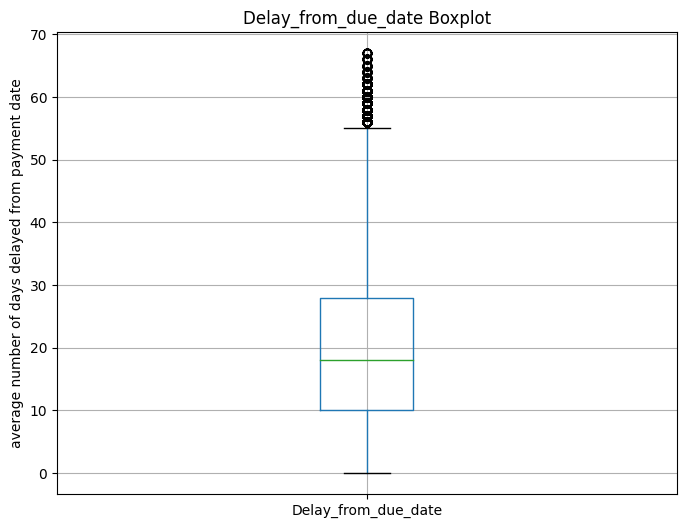

In [ ]:
# Visualize outliers
variables = ["Delay_from_due_date"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Delay_from_due_date Boxplot")
plt.ylabel("average number of days delayed from payment date")
plt.show()


In [ ]:
(df["Delay_from_due_date"]>55).sum()
# We have a couple outliers with over 55 days in average but that seems like a normal behaviour

4002

## Num_of_Delayed_Payment

In [ ]:
df["Num_of_Delayed_Payment"].value_counts()
#There seem to be a lot of outliers

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [ ]:
def filter_(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value
df["Num_of_Delayed_Payment"]= df["Num_of_Delayed_Payment"].apply(filter_)

In [ ]:
df["Num_of_Delayed_Payment"]= df["Num_of_Delayed_Payment"].astype("Int64")

In [ ]:
df['Num_of_Delayed_Payment'].isna().sum()


7002

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Num_of_Delayed_Payment, customer_id_col):
    df[Num_of_Delayed_Payment] = df.groupby(customer_id_col)[Num_of_Delayed_Payment].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
df = replace_missing_values(df, "Num_of_Delayed_Payment", "Customer_ID")

<ipython-input-834-ec4e5bce09b3>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Num_of_Delayed_Payment] = df.groupby(customer_id_col)[Num_of_Delayed_Payment].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Num_of_Delayed_Payment'].isna().sum()
# There are still a couple outliers that we need to review

0

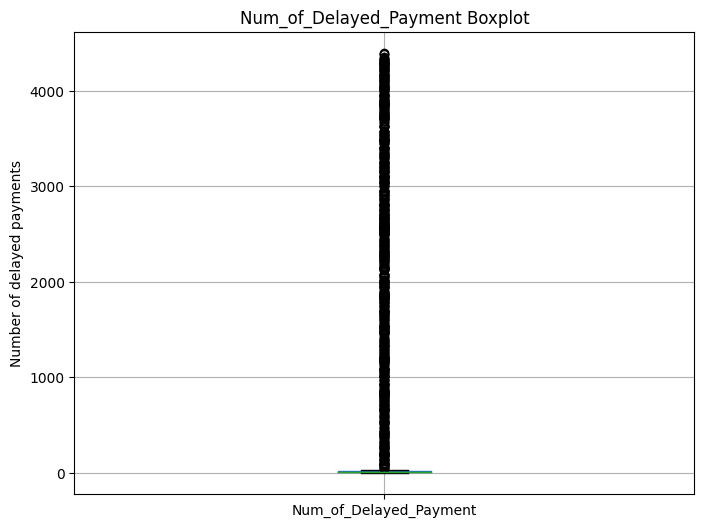

In [ ]:
# Outliers visualization
variables = ["Num_of_Delayed_Payment"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Num_of_Delayed_Payment Boxplot")
plt.ylabel("Number of delayed payments")
plt.show()

In [ ]:
# We'll convert this column to categorical by using percentiles to reduce the noise caused by the outliers
# We'll Define percentiles for categorization
Q1 = df["Num_of_Delayed_Payment"].quantile(0.25)
Q3 = df["Num_of_Delayed_Payment"].quantile(0.75)

# We'll create a function to categorize the data
def categorize_loans(num_loans):
    if num_loans <= Q1:
        return "Low"
    elif Q1 < num_loans <= Q3:
        return "Medium"
    else:
        return "High"

# We'll apply the categorization function to create a new column
df["Delayed_Payment_Category"] = df["Num_of_Delayed_Payment"].apply(categorize_loans)

In [ ]:
df["Delayed_Payment_Category"].value_counts()

Medium    47949
Low       28047
High      24004
Name: Delayed_Payment_Category, dtype: int64

## Delayed_Payment_Category

(Categorial column created from the Num_of_Delayed_Payment column)

In [ ]:
df["Delayed_Payment_Category"].value_counts()

Medium    47949
Low       28047
High      24004
Name: Delayed_Payment_Category, dtype: int64

In [ ]:
# We'll replace the values to convert this column to numerical
df['Delayed_Payment_Category'] = df['Delayed_Payment_Category'].replace({'Low': 1, 'Medium': 2,'High': 3})
df['Delayed_Payment_Category'].value_counts()

2    47949
1    28047
3    24004
Name: Delayed_Payment_Category, dtype: int64

In [ ]:
df['Delayed_Payment_Category'].isna().sum()

0

## Changed_Credit_Limit

In [ ]:
df["Changed_Credit_Limit"].value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [ ]:
df["Changed_Credit_Limit"].describe()

count     100000
unique      4384
top            _
freq        2091
Name: Changed_Credit_Limit, dtype: object

In [ ]:
# We'll replace the "_" values for nan
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_',np.nan)

In [ ]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype("float")

In [ ]:
df["Changed_Credit_Limit"].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [ ]:
#We'll replace the missing values with the mean
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].fillna(df["Changed_Credit_Limit"].mean())

In [ ]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].round(3)

In [ ]:
df["Changed_Credit_Limit"].value_counts()

 10.389    2091
 8.220      135
 11.500     127
 11.320     126
 7.350      121
           ... 
-5.780        1
 30.100       1
 35.890       1
-3.670        1
 21.170       1
Name: Changed_Credit_Limit, Length: 3635, dtype: int64

In [ ]:
df['Changed_Credit_Limit'].isna().sum()

0

In [ ]:
#We'll replace negative values with nan
def replace_negative_with_nan(df, Changed_Credit_Limit):
    df[Changed_Credit_Limit] = df[Changed_Credit_Limit].apply(lambda x: np.nan if x < 0 else x)
    return df

In [ ]:
df = replace_negative_with_nan(df, 'Changed_Credit_Limit')

In [ ]:
df['Changed_Credit_Limit'].isna().sum()

1586

In [ ]:
df["Changed_Credit_Limit"].value_counts()

10.389    2091
8.220      135
11.500     127
11.320     126
7.350      121
          ... 
30.100       1
34.770       1
30.600       1
28.090       1
21.170       1
Name: Changed_Credit_Limit, Length: 3103, dtype: int64

In [ ]:
df['Changed_Credit_Limit'].isna().sum()

1586

In [ ]:
#We'll replace the missing values with the mean
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].fillna(df["Changed_Credit_Limit"].mean())

In [ ]:
df['Changed_Credit_Limit'].isna().sum()

0

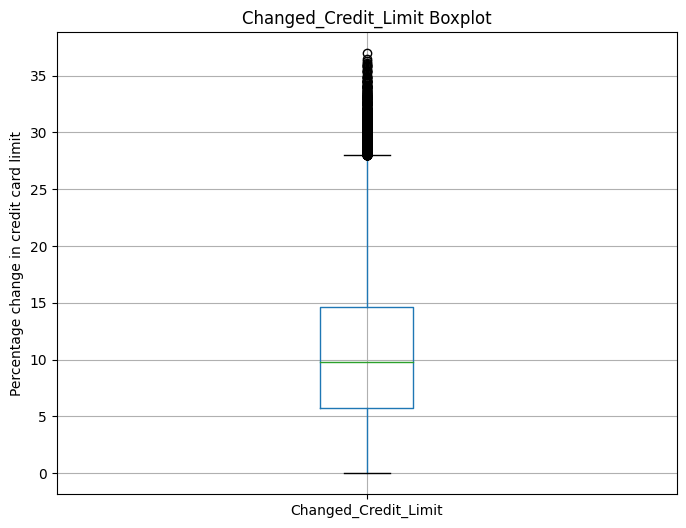

In [ ]:
# Outliers visualization
variables = ["Changed_Credit_Limit"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Changed_Credit_Limit Boxplot")
plt.ylabel("Percentage change in credit card limit")
plt.show()

# We have a couple outliers in this column but this seems to be normal behaviour considering the income of the clients

In [ ]:
df["Changed_Credit_Limit"].describe()

count    100000.000000
mean         10.594580
std           6.516815
min           0.000000
25%           5.760000
50%           9.790000
75%          14.660000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

## Num_Credit_Inquiries

In [ ]:
df["Num_Credit_Inquiries"].value_counts().sort_index()

0.0        6972
1.0        7588
2.0        8028
3.0        8890
4.0       11271
          ...  
2588.0        1
2589.0        2
2592.0        2
2594.0        1
2597.0        1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [ ]:
df['Num_Credit_Inquiries'].isna().sum()

1965

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Num_Credit_Inquiries, customer_id_col):
    df[Num_Credit_Inquiries] = df.groupby(customer_id_col)[Num_Credit_Inquiries].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
df = replace_missing_values(df, "Num_Credit_Inquiries", "Customer_ID")

<ipython-input-863-52c996a462d0>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Num_Credit_Inquiries] = df.groupby(customer_id_col)[Num_Credit_Inquiries].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Num_Credit_Inquiries'].isna().sum()

0

In [ ]:
df.Num_Credit_Inquiries.describe()

count    100000.000000
mean         27.752960
std         193.146827
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

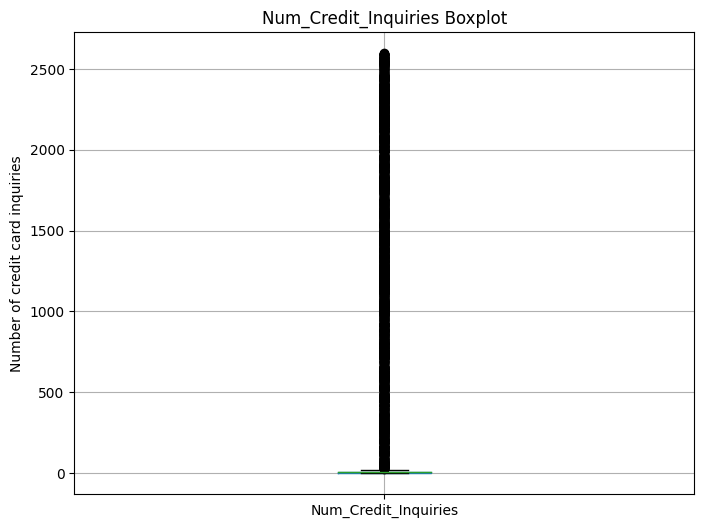

In [ ]:
# Outliers visualization
variables = ["Num_Credit_Inquiries"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Num_Credit_Inquiries Boxplot")
plt.ylabel("Number of credit card inquiries")
plt.show()
# We have some high values in this feature seem to be illogical.

In [ ]:
# We'll try to provde the values are illogical by visualizing the behaviour of the clients by month
new_df = df[['Customer_ID', 'Month', 'Num_Credit_Inquiries']].copy()

In [ ]:
new_df.head(100)

,Customer_ID,Month,Num_Credit_Inquiries
0,CUS_0xd40,1,4.0
1,CUS_0xd40,2,4.0
2,CUS_0xd40,3,4.0
3,CUS_0xd40,4,4.0
4,CUS_0xd40,5,4.0
...,...,...,...
95,CUS_0xc0ab,8,3.0
96,CUS_0x3e45,1,3.0
97,CUS_0x3e45,2,3.0
98,CUS_0x3e45,3,3.0


In [ ]:
high_inquiries_customers = new_df[new_df['Num_Credit_Inquiries'] > 1000]

In [ ]:
high_inquiries_customers.head(100)

,Customer_ID,Month,Num_Credit_Inquiries
173,CUS_0xa16e,6,1050.0
193,CUS_0xa5f9,2,1044.0
198,CUS_0xa5f9,7,1936.0
199,CUS_0xa5f9,8,1936.0
312,CUS_0x571f,1,1618.0
...,...,...,...
10094,CUS_0x23a5,7,2308.0
10134,CUS_0xb713,7,1050.0
10135,CUS_0xb713,8,1050.0
10223,CUS_0xc5d7,8,2018.0


In [ ]:
specific_customer_df = new_df[new_df['Customer_ID'] == 'CUS_0xa5f9']

In [ ]:
specific_customer_df.head(30)

,Customer_ID,Month,Num_Credit_Inquiries
192,CUS_0xa5f9,1,12.0
193,CUS_0xa5f9,2,1044.0
194,CUS_0xa5f9,3,17.0
195,CUS_0xa5f9,4,17.0
196,CUS_0xa5f9,5,17.0
197,CUS_0xa5f9,6,17.0
198,CUS_0xa5f9,7,1936.0
199,CUS_0xa5f9,8,1936.0


We took client CUS_0xa5f9	as an example. As you can see in the table above, the number of credit inquiries for the client went from 12 in January to 1044 in february.

Cosidering that, we'll replace all the credit inquiries over the mean (27) for nan. After that we'll replace the missing values using the costumer ID.

In [ ]:
#replace all the values higher than 27 for NAN
for i in range(len(df["Num_Credit_Inquiries"])):
    if df["Num_Credit_Inquiries"][i] > 27:
        df["Num_Credit_Inquiries"][i] = np.nan
    else:
        df["Num_Credit_Inquiries"][i] = df["Num_Credit_Inquiries"][i]

<ipython-input-874-a1098b3e3db0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Credit_Inquiries"][i] = df["Num_Credit_Inquiries"][i]
<ipython-input-874-a1098b3e3db0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Num_Credit_Inquiries"][i] = np.nan


In [ ]:
df = replace_missing_values(df, "Num_Credit_Inquiries", "Customer_ID")

<ipython-input-863-52c996a462d0>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Num_Credit_Inquiries] = df.groupby(customer_id_col)[Num_Credit_Inquiries].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Num_Credit_Inquiries'].isna().sum()

0

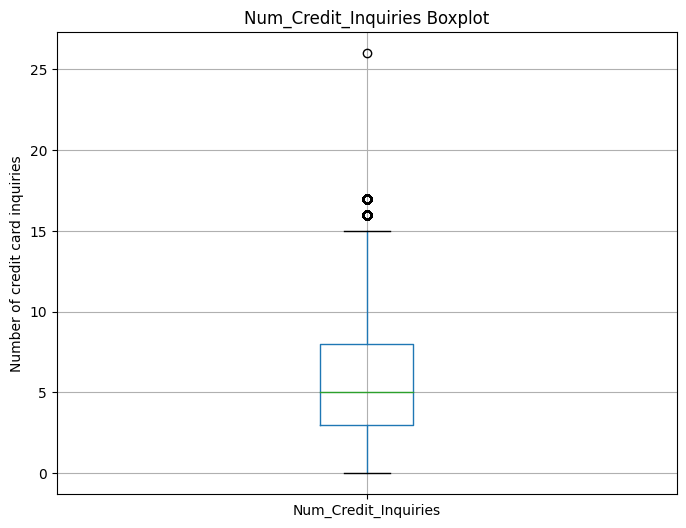

In [ ]:
# Outliers visualization
variables = ["Num_Credit_Inquiries"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Num_Credit_Inquiries Boxplot")
plt.ylabel("Number of credit card inquiries")
plt.show()
# The feature is feature balanced now

## Credit_Mix

In [ ]:
df["Credit_Mix"].value_counts().sort_index()

Bad         18989
Good        24337
Standard    36479
_           20195
Name: Credit_Mix, dtype: int64

In [ ]:
# We'll replace the "_" values with nan
df['Credit_Mix']= df['Credit_Mix'].replace('_',np.nan)

In [ ]:
df['Credit_Mix'].isna().sum()

20195

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Credit_Mix, customer_id_col):
    df[Credit_Mix] = df.groupby(customer_id_col)[Credit_Mix].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
df = replace_missing_values(df, "Credit_Mix", "Customer_ID")

<ipython-input-881-92bfbc161e4c>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Credit_Mix] = df.groupby(customer_id_col)[Credit_Mix].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Credit_Mix'].isna().sum()

0

In [ ]:
df["Credit_Mix"].value_counts().sort_index()

Bad         23768
Good        30384
Standard    45848
Name: Credit_Mix, dtype: int64

In [ ]:
# We'll replace the values to convert this column to numerical
df['Credit_Mix'] = df['Credit_Mix'].replace({'Bad': 1, 'Standard': 2,'Good': 3})
df['Credit_Mix'].value_counts()

2    45848
3    30384
1    23768
Name: Credit_Mix, dtype: int64

Outstanding_Debt

In [ ]:
df["Outstanding_Debt"].value_counts().sort_index()

0.23      8
0.34      8
0.54      8
0.56      8
0.77      8
         ..
998.95    8
999.12    8
999.25    8
999.36    8
999.48    8
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [ ]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].apply(filter_col)

In [ ]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)

In [ ]:
df['Outstanding_Debt'].isna().sum()

0

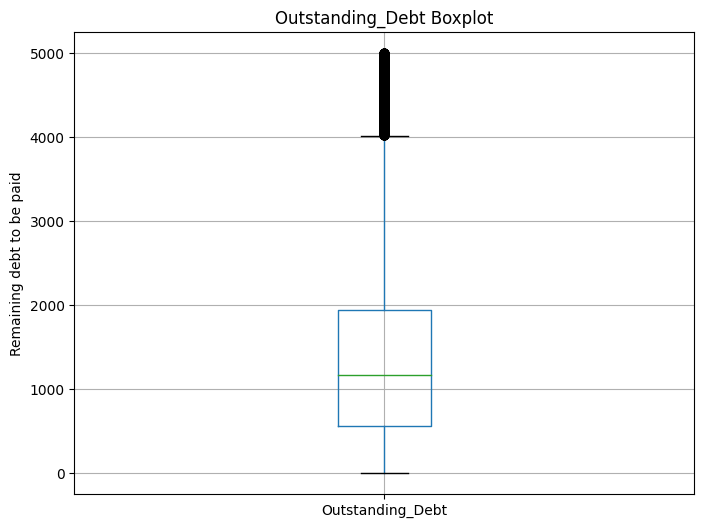

In [ ]:
# Outliers visualization
variables = ["Outstanding_Debt"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Outstanding_Debt Boxplot")
plt.ylabel("Remaining debt to be paid")
plt.show()
# A couple outliers but it makes sense

##Credit_Utilization_Ratio

In [ ]:
df["Credit_Utilization_Ratio"].value_counts().sort_index()

20.000000    1
20.100770    1
20.172942    1
20.244130    1
20.257073    1
            ..
49.064277    1
49.254983    1
49.522324    1
49.564519    1
50.000000    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

In [ ]:
df["Credit_Utilization_Ratio"]=df["Credit_Utilization_Ratio"].round(3)

In [ ]:
df['Credit_Utilization_Ratio'].isna().sum()

0

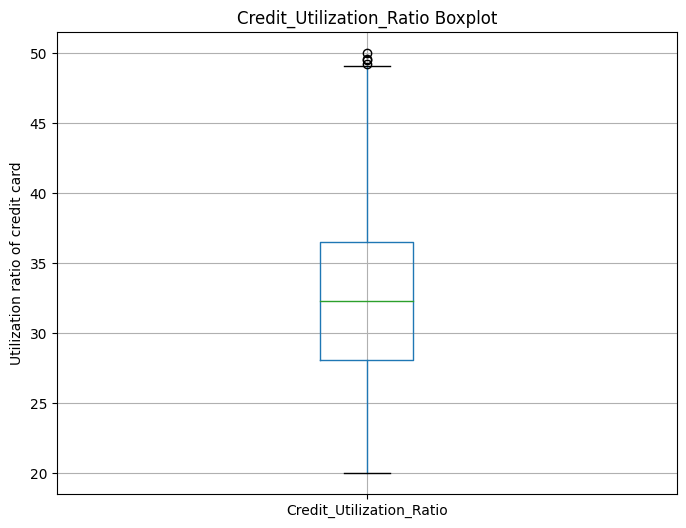

In [ ]:
# Outliers visualization
variables = ["Credit_Utilization_Ratio"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Credit_Utilization_Ratio Boxplot")
plt.ylabel("Utilization ratio of credit card")
plt.show()
# A couple outliers but it makes sense

## Credit_History_Age

In [ ]:
df["Credit_History_Age"].value_counts().sort_index()

0 Years and 1 Months       2
0 Years and 10 Months     79
0 Years and 11 Months     77
0 Years and 2 Months      15
0 Years and 3 Months      20
                        ... 
9 Years and 5 Months     246
9 Years and 6 Months     212
9 Years and 7 Months     219
9 Years and 8 Months     251
9 Years and 9 Months     261
Name: Credit_History_Age, Length: 404, dtype: int64

In [ ]:
df['Credit_History_Age'].isna().sum()

9030

In [ ]:
# We'll extract years and months from the Credit_History_Age column and create two new columns to store the months and  years.

years  = []
months = []
for value in df["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
df['Credit_Age_years'] = pd.Series(years)
df['Credit_Age_months'] = pd.Series(months)
df.drop('Credit_History_Age',axis=1,inplace=True)

In [ ]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Loan_Category,Delayed_Payment_Category,Credit_Age_years,Credit_Age_months
0,CUS_0xd40,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,2,1,22.0,1.0
1,CUS_0xd40,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2,1,NaN,NaN
2,CUS_0xd40,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,2,1,22.0,3.0
3,CUS_0xd40,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,2,1,22.0,4.0
4,CUS_0xd40,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,2,1,22.0,5.0


##Credit_Age_years

In [ ]:
df["Credit_Age_years"].value_counts().sort_index()

0.0      490
1.0     1001
2.0      938
3.0      809
4.0      762
5.0     2033
6.0     3054
7.0     2575
8.0     2814
9.0     2803
10.0    2618
11.0    2703
12.0    2790
13.0    3048
14.0    2360
15.0    3854
16.0    4526
17.0    4718
18.0    4747
19.0    4784
20.0    3325
21.0    2708
22.0    2721
23.0    2789
24.0    2764
25.0    2522
26.0    2727
27.0    2622
28.0    2767
29.0    2812
30.0    2982
31.0    2799
32.0    2899
33.0    1106
Name: Credit_Age_years, dtype: int64

In [ ]:
df['Credit_Age_years'].isna().sum()

9030

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Credit_Age_years, customer_id_col):
    df[Credit_Age_years] = df.groupby(customer_id_col)[Credit_Age_years].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
df = replace_missing_values(df, "Credit_Age_years", "Customer_ID")

<ipython-input-901-51eb71f540b7>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Credit_Age_years] = df.groupby(customer_id_col)[Credit_Age_years].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Credit_Age_years'].isna().sum()

0

##Credit_Age_months

In [ ]:
df["Credit_Age_months"].value_counts().sort_index()

0.0     6920
1.0     6885
2.0     7894
3.0     7925
4.0     7950
5.0     7972
6.0     6829
7.0     6738
8.0     7901
9.0     7884
10.0    8026
11.0    8046
Name: Credit_Age_months, dtype: int64

In [ ]:
df['Credit_Age_months'].isna().sum()

9030

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Credit_Age_months, customer_id_col):
    df[Credit_Age_months] = df.groupby(customer_id_col)[Credit_Age_months].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
df = replace_missing_values(df, "Credit_Age_months", "Customer_ID")

<ipython-input-906-fcc02c6311b7>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Credit_Age_months] = df.groupby(customer_id_col)[Credit_Age_months].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Credit_Age_months'].isna().sum()

0

##Payment_of_Min_Amount

In [ ]:
df["Payment_of_Min_Amount"].value_counts().sort_index()

NM     12007
No     35667
Yes    52326
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
df['Payment_of_Min_Amount'].isna().sum()

0

In [ ]:
# We'll replace the values to convert this column to numerical
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'No': 0, 'Yes': 1,'NM': 2})
df['Payment_of_Min_Amount'].value_counts()

1    52326
0    35667
2    12007
Name: Payment_of_Min_Amount, dtype: int64

##Total_EMI_per_month

In [ ]:
df["Total_EMI_per_month"].value_counts().sort_index()

0.000000        10613
4.462837            8
4.713184            8
4.865690            8
4.916139            8
                ...  
82193.000000        1
82204.000000        1
82236.000000        1
82256.000000        1
82331.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [ ]:
df["Total_EMI_per_month"]=df["Total_EMI_per_month"].astype("float")

In [ ]:
df["Total_EMI_per_month"]=df["Total_EMI_per_month"].round(3)

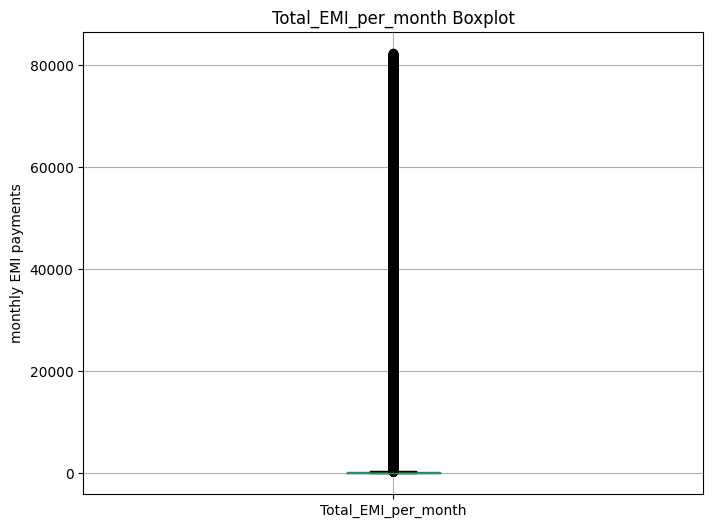

In [ ]:
# Outliers visualization
variables = ["Total_EMI_per_month"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Total_EMI_per_month Boxplot")
plt.ylabel("monthly EMI payments")
plt.show()
# There is a significant number of outliers in this column
# We'll leave them because these values represent valid and fixed financial obligations that borrowers are responsible for, and their variation may be a result of diverse financial backgrounds among our clients.

In [ ]:
df['Total_EMI_per_month'].isna().sum()

0

## Amount_invested_monthly

In [ ]:
df["Amount_invested_monthly"].value_counts().sort_index()

0.0                    169
10.010194262612963       1
10.011424795004293       1
10.03659960594723        1
10.053768350640556       1
                      ... 
999.285277314897         1
999.7085009554547        1
999.8146215137691        1
999.8610676363429        1
__10000__             4305
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [ ]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].replace("__10000__",np.nan)
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype("float")
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].round(3)

In [ ]:
df['Amount_invested_monthly'].isna().sum()

8784

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Amount_invested_monthly, customer_id_col):
    df[Amount_invested_monthly] = df.groupby(customer_id_col)[Amount_invested_monthly].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
df = replace_missing_values(df, "Amount_invested_monthly", "Customer_ID")

<ipython-input-920-10cc0f3b5955>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Amount_invested_monthly] = df.groupby(customer_id_col)[Amount_invested_monthly].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Amount_invested_monthly'].isna().sum()

0

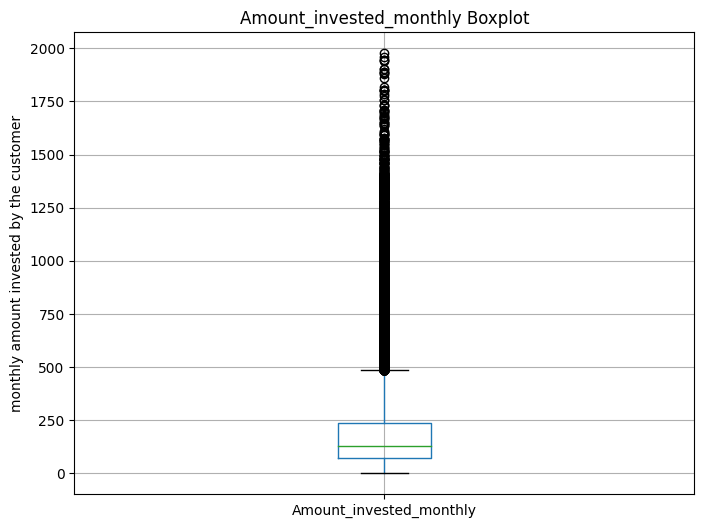

In [ ]:
# Outliers visualization
variables = ["Amount_invested_monthly"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Amount_invested_monthly Boxplot")
plt.ylabel("monthly amount invested by the customer")
plt.show()


We have a significan number of outliers but this seems to be accurate based on the diverse financial backgrounds among the clients

##Payment_Behaviour

In [ ]:
df["Payment_Behaviour"].value_counts().sort_index()

!@9#%8                               7600
High_spent_Large_value_payments     13721
High_spent_Medium_value_payments    17540
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Low_spent_Medium_value_payments     13861
Low_spent_Small_value_payments      25513
Name: Payment_Behaviour, dtype: int64

In [ ]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [ ]:
# Generate a fuction to replace the missing values using the costumer ID
# replace method: per customer ID backward fill, if not having value-> forward fill.
def replace_missing_values(df, Payment_Behaviour, customer_id_col):
    df[Payment_Behaviour] = df.groupby(customer_id_col)[Payment_Behaviour].apply(lambda x: x.bfill().ffill())
    return df

In [ ]:
df = replace_missing_values(df, "Payment_Behaviour", "Customer_ID")

<ipython-input-926-0f7fc109973e>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[Payment_Behaviour] = df.groupby(customer_id_col)[Payment_Behaviour].apply(lambda x: x.bfill().ffill())


In [ ]:
df['Payment_Behaviour'].isna().sum()

0

In [ ]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)

In [ ]:
df["Payment_Behaviour"].value_counts().sort_index()

1    27610
2    15037
3    11284
4    12278
5    18968
6    14823
Name: Payment_Behaviour, dtype: int64

In [ ]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].astype("int64")

## Monthly_Balance

In [ ]:
df["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [ ]:
df['Monthly_Balance']=df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)
df['Monthly_Balance']=df['Monthly_Balance'].astype("float")

In [ ]:
df['Monthly_Balance'].isna().sum()

1209

In [ ]:
df['Monthly_Balance']=df['Monthly_Balance'].fillna(df["Monthly_Balance"].mean())
df['Monthly_Balance']=df['Monthly_Balance'].round(3)

In [ ]:
df['Monthly_Balance'].isna().sum()

0

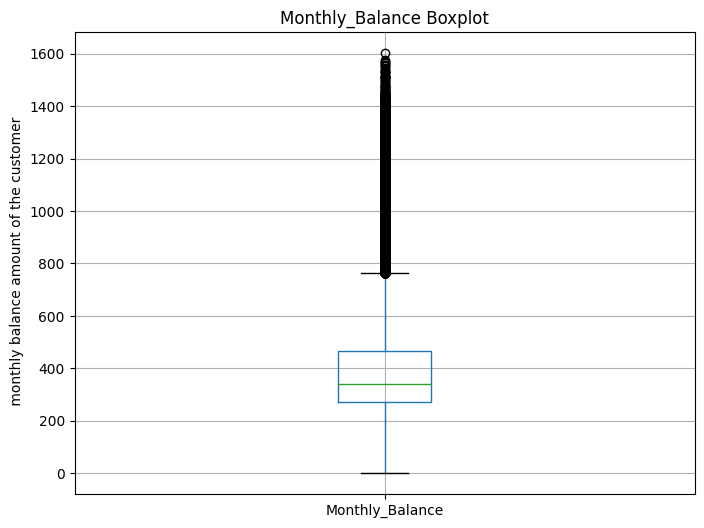

In [ ]:
# Outliers visualization
variables = ["Monthly_Balance"]
data = df[variables]
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title("Monthly_Balance Boxplot")
plt.ylabel(" monthly balance amount of the customer")
plt.show()
# Same behaviour as other income associated columns

## Credit_Score

In [ ]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
df['Credit_Score'].isna().sum()
# This column seems to be ok with no missing values

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  int64  
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  Int64  
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

###########################################################

We'll end this section by eliminating the columns that we won't be needing

In [ ]:
df = df.drop(columns=['Num_of_Loan','Num_of_Delayed_Payment', 'Customer_ID'],axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  int64  
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

#Data Visualization

## Histograms

Let's start by looking at histograms of all the columns in the DataFrame

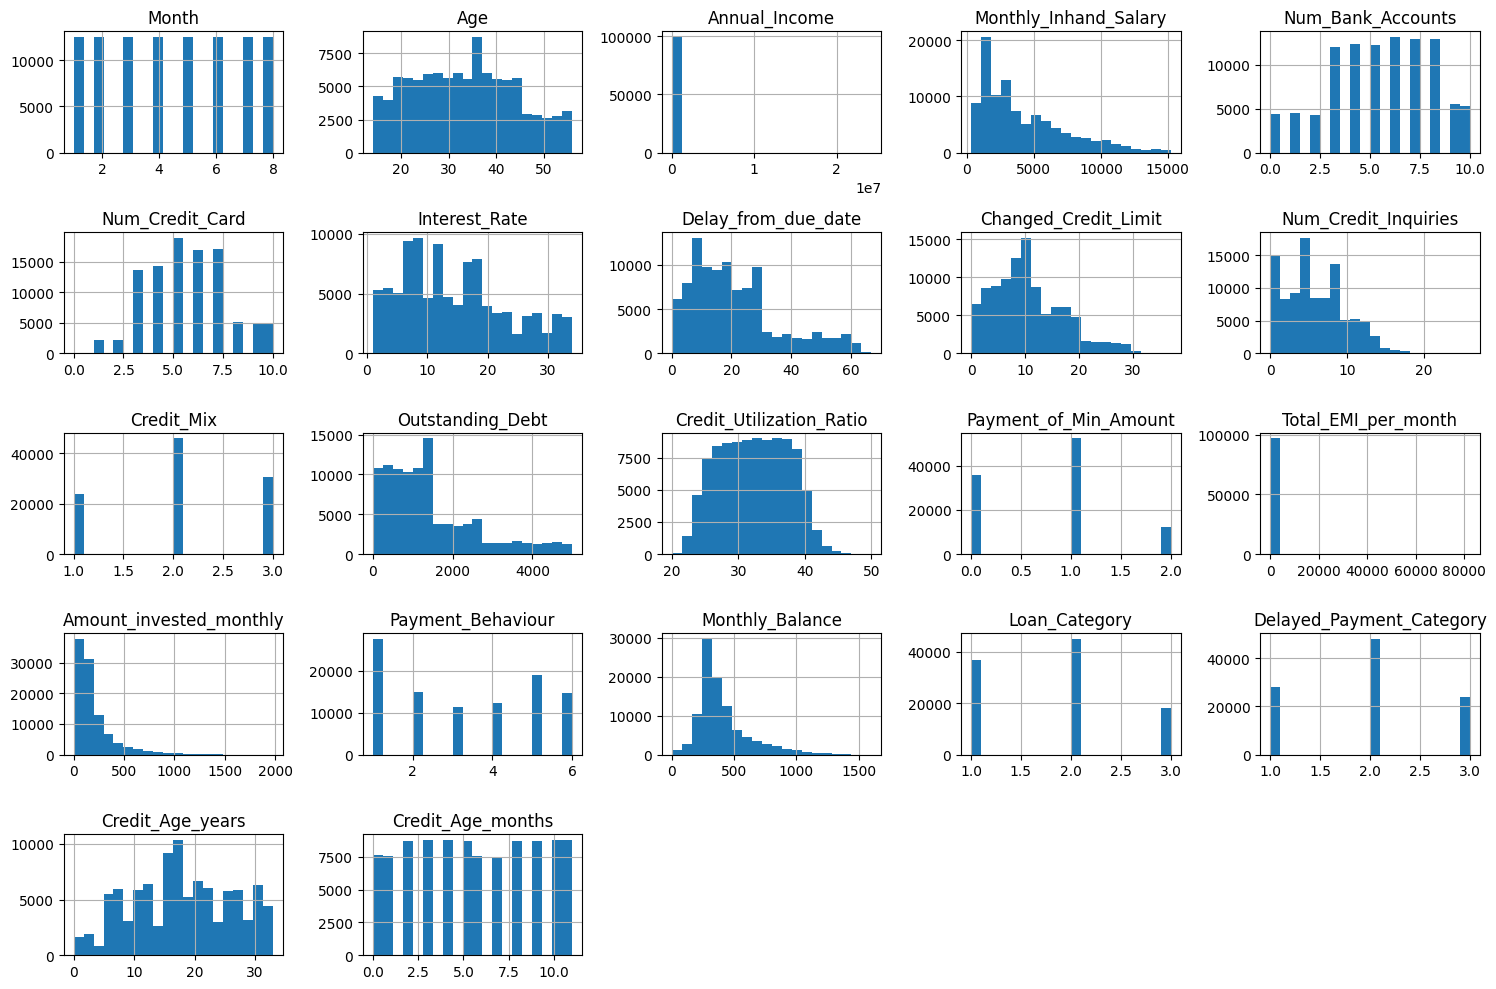

In [ ]:
df.hist(bins=20,figsize=(15,10))
plt.tight_layout()
plt.show()

- Month:
The histogram of the 'Month' column in our dataset reveals a unique and intriguing distribution pattern. The 'Month' column represents the timeline of our data, and typically, one might expect to observe variations in the frequency of events or transactions across different months. However, in our case, we have consistently recorded 12,500 occurrences for each month, from January to August. This uniform distribution is a result of our data capturing a specific group of 12,500 unique customer IDs each month. This phenomenon suggests that the dataset contains recurring interactions with this set of customers, leading to an equal representation of each month's data. This finding provides valuable insight into our data collection process and underscores the importance of understanding the context and composition of our dataset when interpreting its distribution characteristics

- Age: The histogram of Age reveals an interesting distribution pattern. The graph exhibits a slight right skew, suggesting that the majority of our clients are younger than 50 years old. Notably, there is a pronounced peak in the number of clients around the ages of 37, indicating a significant concentration of clients within this age group. This insight can be valuable for tailoring our services or marketing strategies to cater to the needs and preferences of this specific demographic. Additionally, it's essential to consider the implications of this age distribution when performing further analyses or building predictive models, as age may be a relevant factor in understanding client behavior or outcomes

- Annual_Income: The histogram representing annual income can initially appear challenging to interpret due to its format in scientific notation (1e7). However, a more comprehensive examination, as demonstrated by the boxplot we reviewed earlier, reveals a wide range of income levels among our clients. The mean annual income is approximately 176,415, but what stands out is the presence of numerous outliers, with some clients reporting annual incomes as high as 24,198,060. This variation in income aligns with our understanding that clients' income levels can significantly differ based on factors such as their geographic location and client type, whether they are individuals or organizations.

- Monthly_Inhand_Salary: Much like the annual income, the histogram for monthly in-hand salary exhibits a noticeable right skew, suggesting that the majority of clients have relatively lower monthly salaries. The mean monthly salary stands at 4,198, with a substantial number of clients reporting salaries exceeding 15,000. This skewness reflects the income disparities among our clients, which can be attributed to various factors such as their occupation, seniority, or location.

- Num_Bank_Accounts, Num_Credit_Card, Credit_Utilization_Ratio, Credit_Age_Years: The histograms for these columns reveal a distinctive and often desirable distribution pattern - a bell-shaped or approximately normal distribution. In such distributions, the majority of clients tend to cluster around the central values, resulting in a symmetrical appearance with a peak at the mean. This suggests that a significant portion of our clients exhibit average or typical behaviors in terms of the number of bank accounts, the number of credit cards, credit utilization ratios, and credit age in years.

This bell-shaped pattern indicates that most clients fall within a similar range, making these columns valuable for predictive modeling as they can help capture typical client profiles.

- Interest_Rate, Delay_from_due_date, Changed_Credit_limit, Num_Credit_Inquiries, Outstanding_Debt, Amount_Invested_Monthly, Monthly_Balance: These columns exhibit right-skewed distributions with notable commonalities. The majority of clients tend to have low values across these attributes, signaling a prevailing trend towards lower interest rates, minimal delays from due dates, negligible changes in credit limits, and limited outstanding debt. Additionally, clients typically report low levels of credit inquiries, modest monthly investments, and conservative monthly balances. This skewness suggests that our client base is characterized by a substantial number of individuals or organizations with conservative financial behaviors and relatively lower financial activity within these categories. While these attributes may dominate, it's essential to explore the tails of these distributions, as they may contain valuable insights into clients with unique financial characteristics or behaviors.

- Payment_of_min_amount and Loan_Category: These columns shed light on the distribution of clients across various loan categories and their payment behaviors. Notably, a substantial proportion of clients gravitate towards the medium range of the number of loans, indicating a common preference for a moderate level of loan engagement. Furthermore, the majority of clients demonstrate a consistent practice of paying the minimum required amount on their credits. This insight underscores the importance of offering a range of loan products that align with the preferences and financial capacities of our diverse client base. Additionally, it highlights the need for tailored strategies and communication to encourage clients to explore other payment options and financial management approaches




## Plot each feature agains targe (Credit_Score)

As part of our exploratory data analysis, we will conduct a comprehensive examination of our dataset by plotting each individual feature against the target variable. This approach will enable us to gain valuable insights into the relationships between our features and the target variable. By visualizing these relationships, we aim to better understand how each feature impacts the target variable, informing our subsequent data preprocessing and modeling efforts

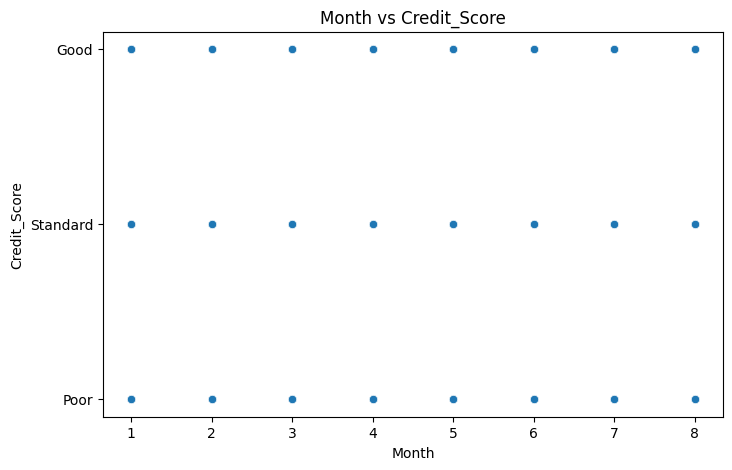

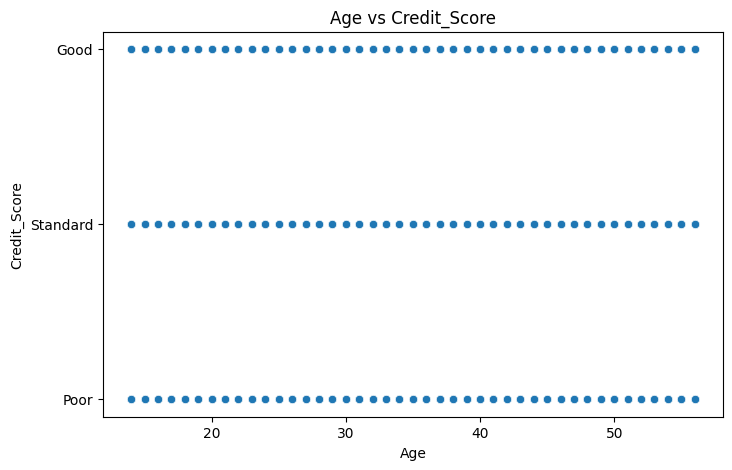

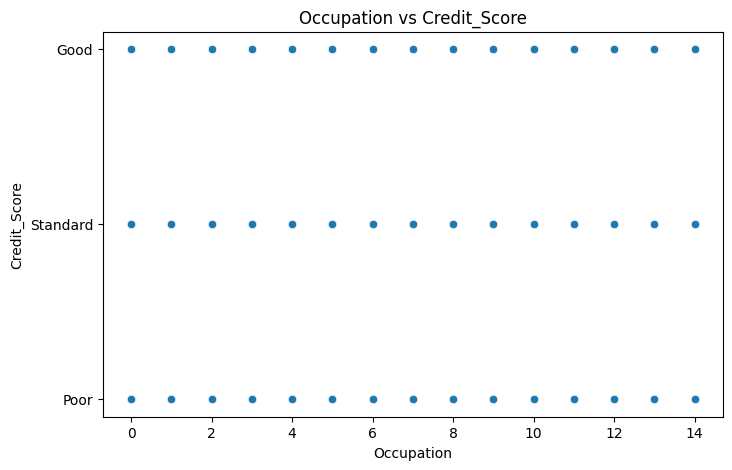

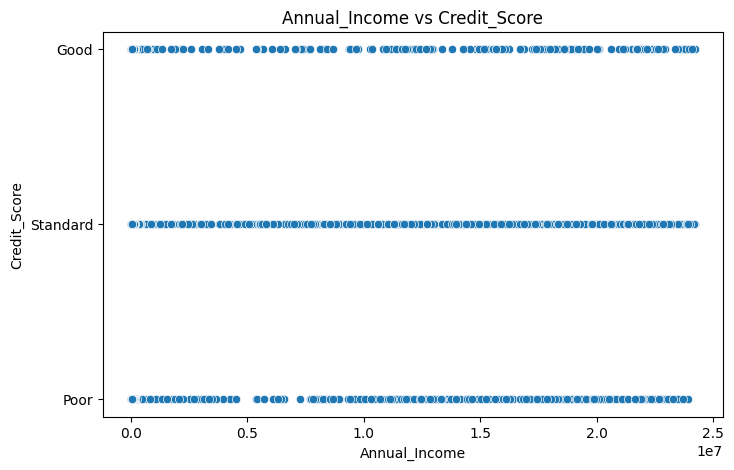

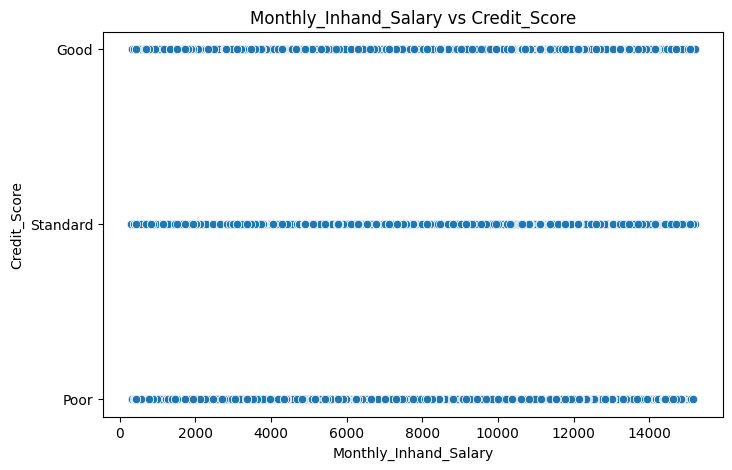

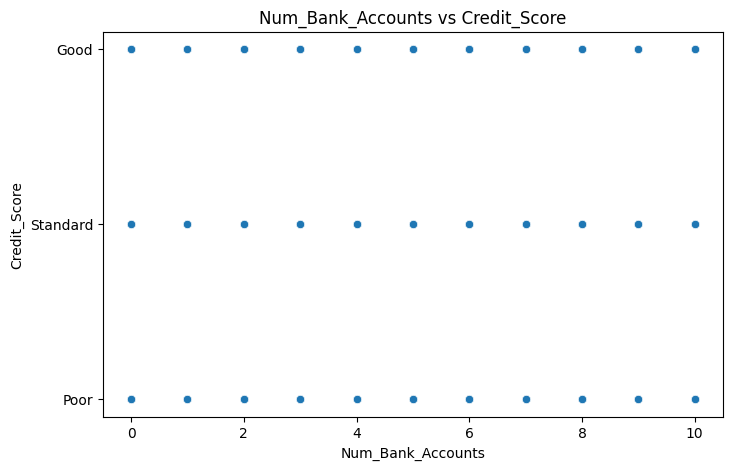

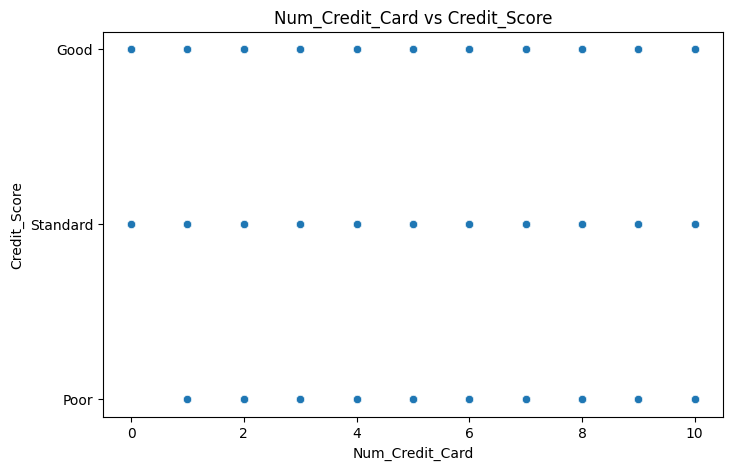

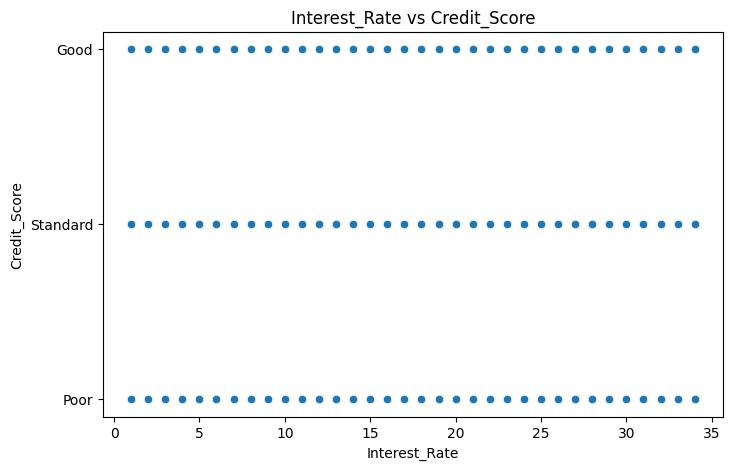

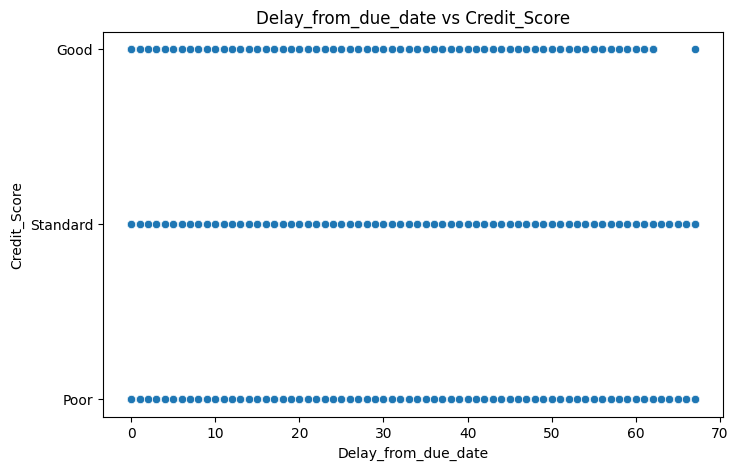

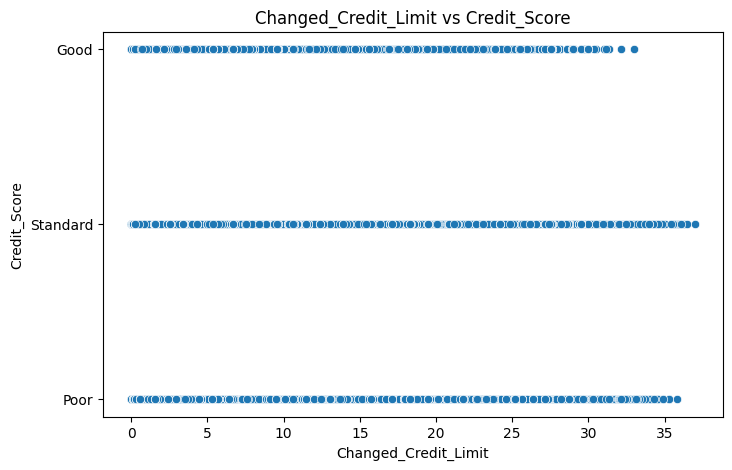

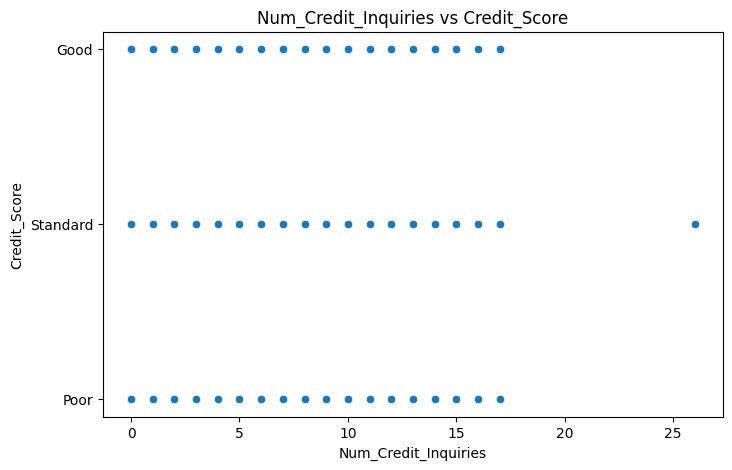

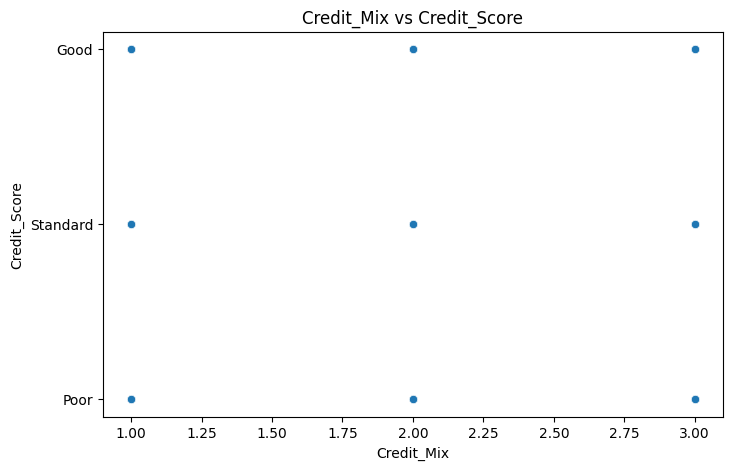

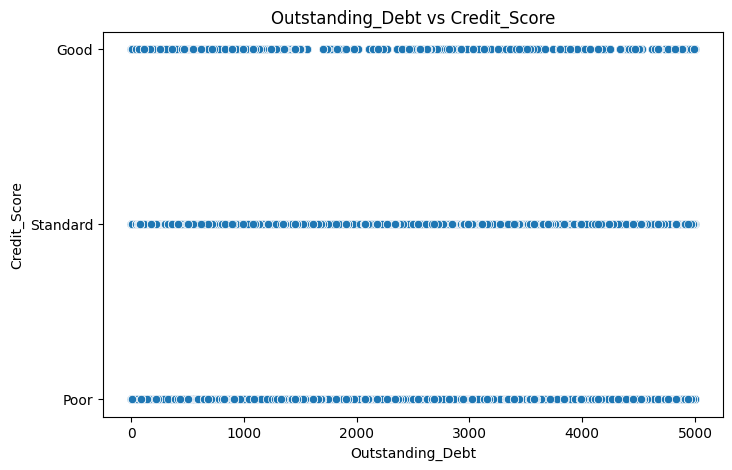

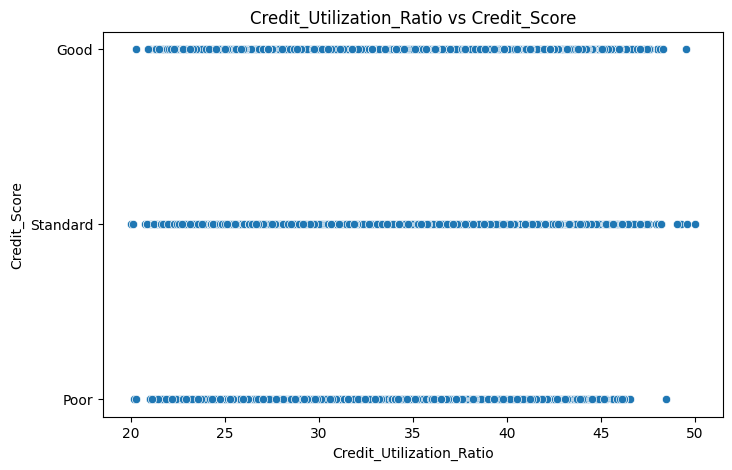

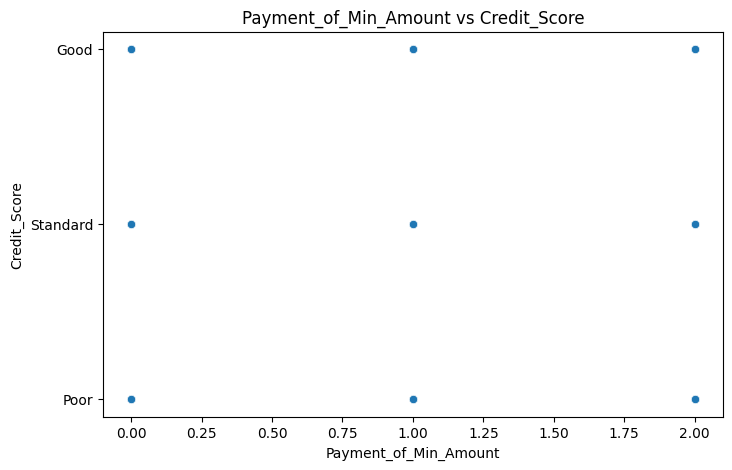

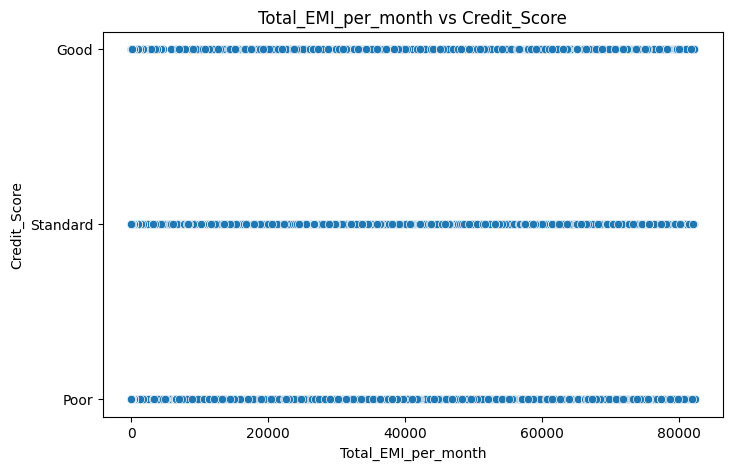

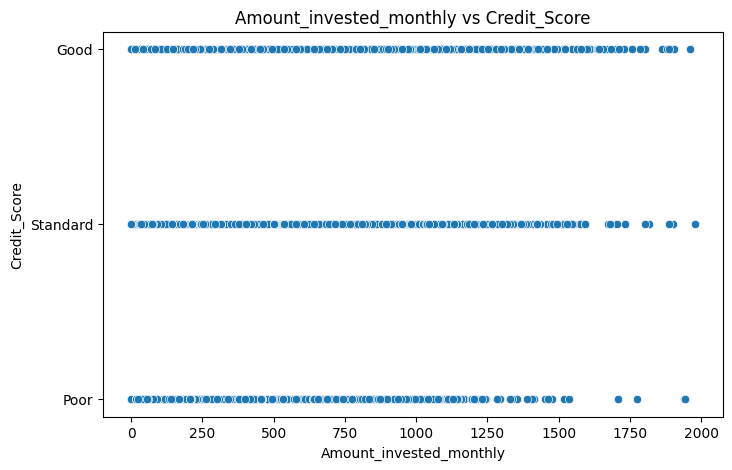

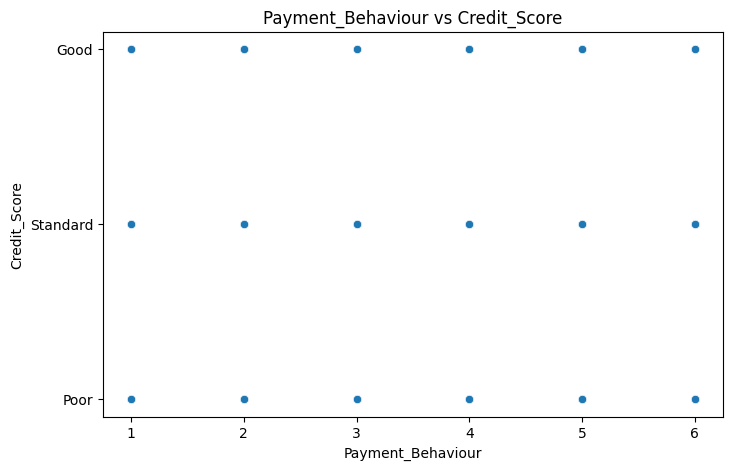

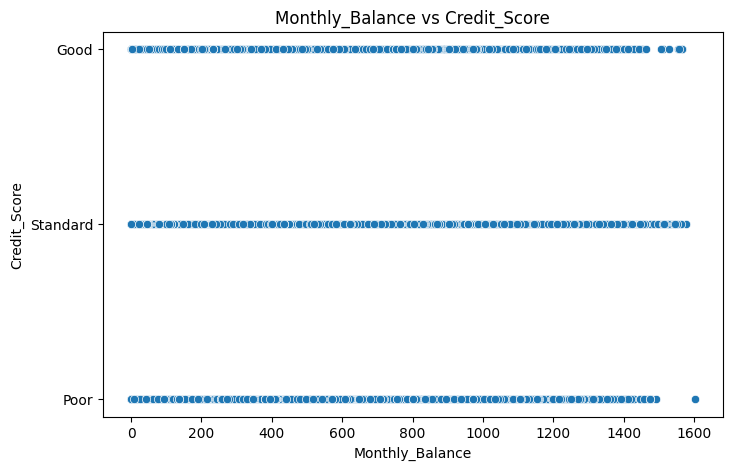

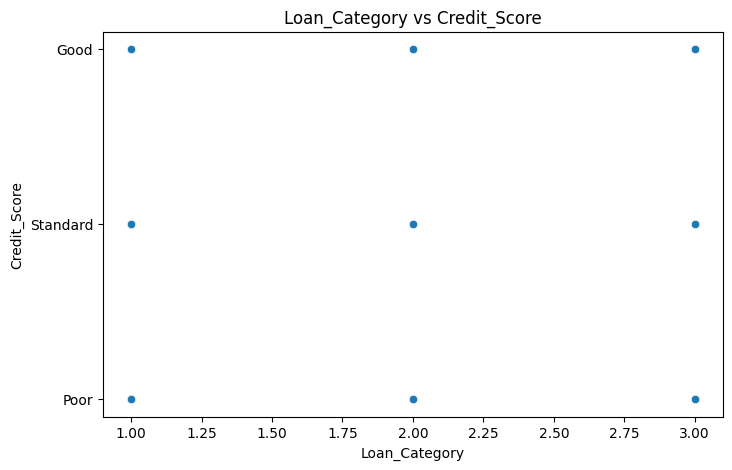

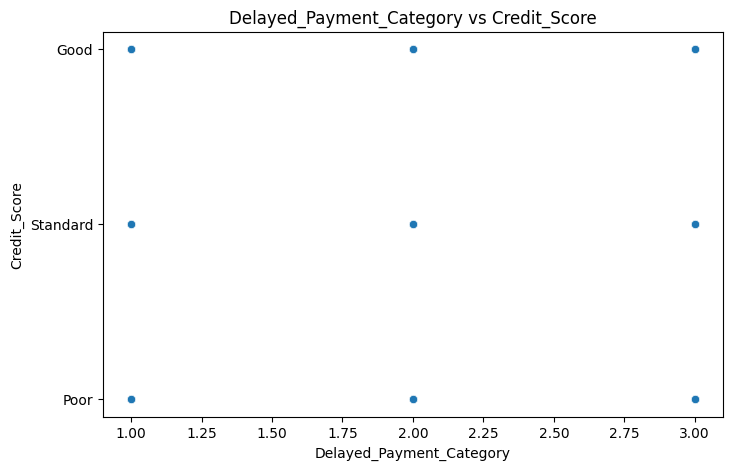

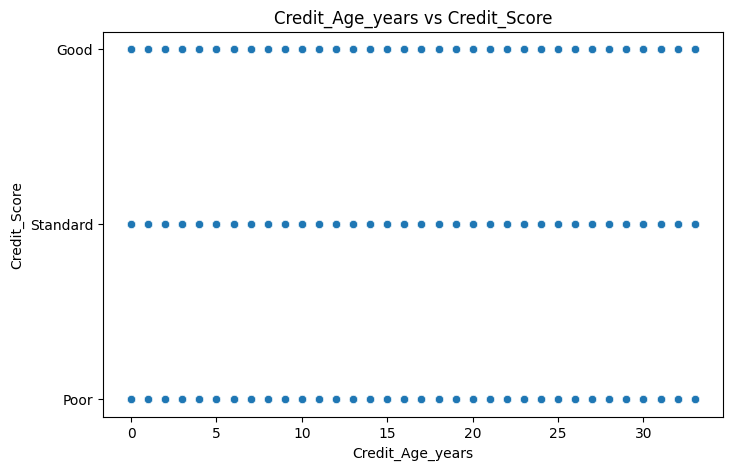

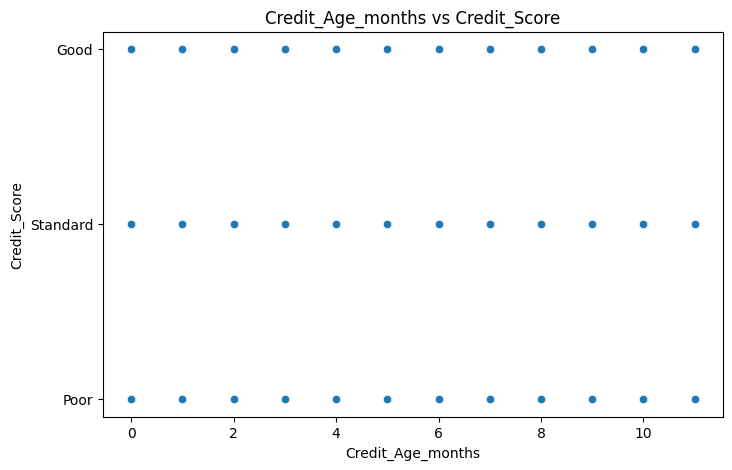

In [ ]:
target_column = 'Credit_Score'

# We'll identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# We'll Plot the numerical features against the target column (scatter plots)
for num_column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=num_column, y=target_column, data=df)
    plt.title(f'{num_column} vs {target_column}')
    plt.xlabel(num_column)
    plt.ylabel(target_column)
    plt.show()



## Heatmap

We'll plot a heatmap to visualize any correlations in the dataset.


<ipython-input-962-872c3b0272b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

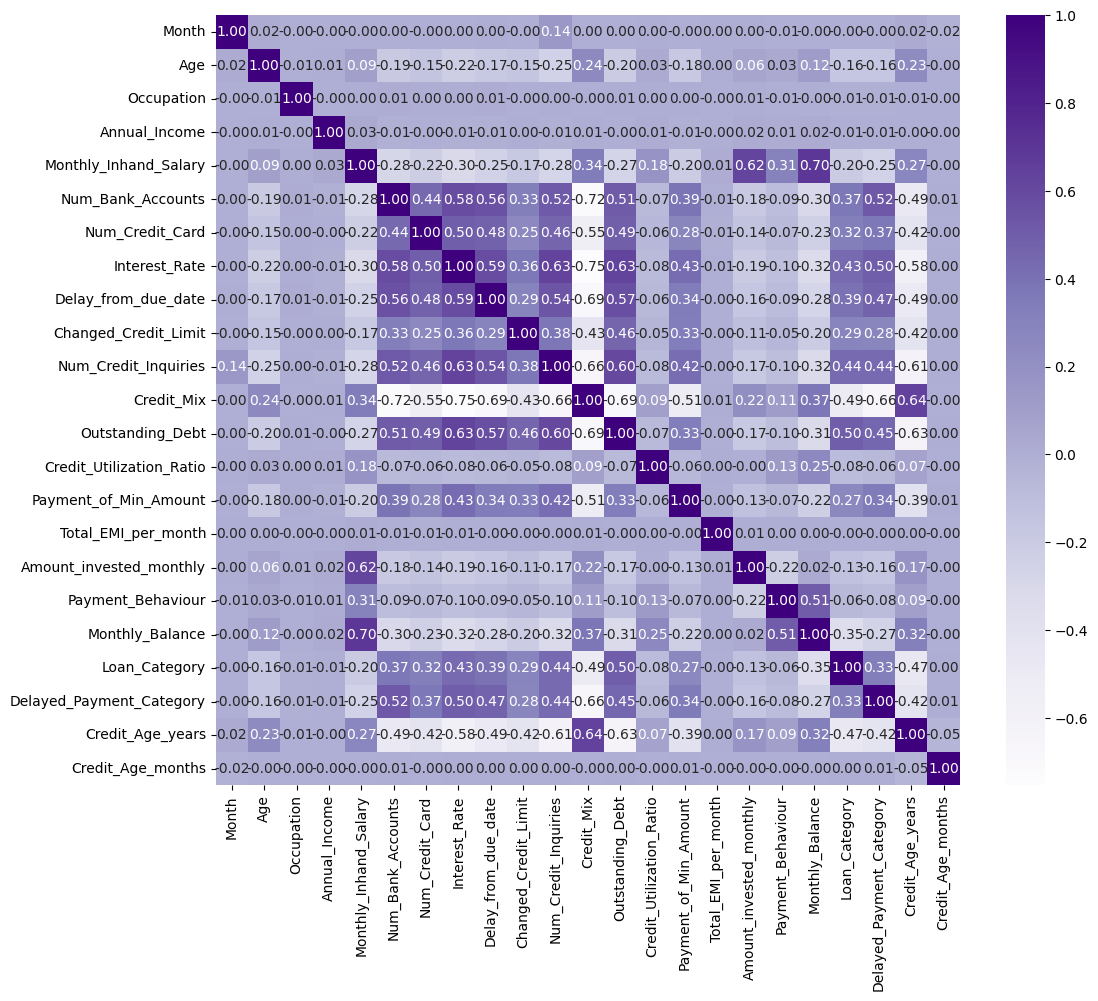

In [962]:
corr = df.corr()

plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr, cmap='Purples', annot=True, fmt=".2f")

In our correlation map (heatmap), several noteworthy correlations emerge. First, we observe positive correlations between the Monthly_Inhand_Salary and both the Amount_Invested_Monthly and Monthly_Balance. This association is intuitive, suggesting that clients with higher monthly incomes tend to invest more and maintain higher monthly balances, which aligns with sound financial practices.

Another notable correlation is the positive relationship between Credit_Mix and Credit_Age_Years. This finding implies that clients with a diverse mix of credit types tend to have longer credit histories. This correlation underscores the potential benefits of maintaining a varied credit portfolio over time.

Furthermore, we identify a smaller yet meaningful positive correlation between Outstanding_Debt and both Interest_Rate and Delay_from_due_date. The latter metric represents the average number of days delayed from the payment date. This association suggests that clients with higher outstanding debts tend to face relatively higher interest rates and more frequent delays in payment, indicating a potential area of concern for further investigation.

These correlations provide valuable insights into the relationships between key financial variables within our dataset, offering a foundation for deeper analyses and data-driven decision-making in our financial services and strategies.

#Modeling

In [ ]:
# We'll use label encoder to convert the occupation category from object to int
label_encoder = preprocessing.LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [ ]:
# Train Test split
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:

# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')  # for categorical data
mean_imputer = SimpleImputer(strategy='mean')  # for numeric data

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')  # This won't be needed in this model
# Scaler
scaler = StandardScaler() # for numeric data
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False) # to turn categorical variables into a numerical representation but it won't be needed

# Numeric pipeline
numeric_pipe = make_pipeline(freq_imputer, scaler)
numeric_pipe

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder= 'passthrough')
preprocessor

# fit on train
preprocessor.fit(X_train)

# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
X_val = preprocessor.transform(X_val)

In [ ]:
# Check all the data is imputed and scaled
print(np.isnan(X_train).sum().sum(), 'missing values in training data')
print(np.isnan(X_test).sum().sum(), 'missing values in testing data')
print(np.isnan(X_val).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train are', X_train.dtype)
print('All data in X_test are', X_test.dtype)
print('All data in X_val are', X_val.dtype)
print('\n')
print('shape of data is', X_train.shape)
print('\n')
X_train

0 missing values in training data
0 missing values in testing data
0 missing values in testing data


All data in X_train are float64
All data in X_test are float64
All data in X_val are float64


shape of data is (70000, 23)




array([[ 0.65307659,  0.34411435, -1.15260294, ..., -1.33227173,
         0.00437913,  0.69665953],
       [ 0.65307659, -1.4218275 ,  0.00786132, ...,  1.44118952,
        -0.95882303, -1.62100016],
       [-1.09201765, -1.14299458, -1.15260294, ..., -1.33227173,
         1.56958263,  0.11724461],
       ...,
       [ 1.08935015, -0.49238442,  0.93623272, ...,  1.44118952,
        -1.0792233 ,  1.56578191],
       [ 0.65307659,  0.34411435,  0.70413987, ..., -1.33227173,
         0.24517967, -0.46217031],
       [-0.65574409, -0.02766288, -0.45632439, ...,  0.05445889,
         0.24517967, -1.04158523]])

In [ ]:
# Convert to DF for better visualization
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.653077,0.344114,-1.152603,-0.110340,-0.944187,-1.301527,0.709494,-1.091310,-1.356298,-0.549405,...,-0.575250,-1.178136,7.246380,-0.529395,-1.215748,-0.396418,-1.134687,-1.332272,0.004379,0.696660
1,0.653077,-1.421828,0.007861,-0.116361,-1.120308,1.398782,0.226074,0.852429,2.086602,0.940528,...,-0.456031,0.362544,-0.165642,-0.721693,-1.215748,-0.666208,1.646701,1.441190,-0.958823,-1.621000
2,-1.092018,-1.142995,-1.152603,-0.102293,-0.484374,-0.915769,-0.257345,-1.319985,-1.018759,0.610625,...,1.216550,-1.178136,-0.165953,0.552035,-1.215748,-0.900482,-1.134687,-1.332272,1.569583,0.117245
3,-1.092018,-0.957106,1.400418,-0.072036,0.529794,0.241507,0.709494,0.738092,1.546539,-1.226089,...,-1.114080,0.362544,-0.135910,2.759780,-1.215748,0.001689,0.256007,1.441190,-0.597622,-1.621000
4,0.216803,0.994725,-1.384696,-0.050714,1.423829,-1.687286,-0.740764,-1.434323,-1.288790,-0.432788,...,-0.517790,-1.178136,-0.143609,-0.621127,1.493069,1.960428,0.256007,-1.332272,1.569583,-1.621000
